# Home Equity Credit Scoring Prediction

## Background

Departemen kredit konsumen bank ingin mengotomatisasi proses pengambilan keputusan untuk persetujuan jalur kredit ekuitas rumah. Untuk melakukan ini, mereka akan mengikuti rekomendasi dari Equal Credit Opportunity Act untuk membuat model penilaian kredit yang berasal secara empiris dan sehat secara statistik. Model ini akan dibangun dari alat pemodelan prediktif, tetapi model yang dibuat harus cukup ditafsirkan untuk memberikan alasan untuk setiap tindakan merugikan (penolakan).

Datasource : Link dataset : https://www.kaggle.com/ajay1735/hmeq-data

### Outline:
    1. Library and Data Extraction
    2. Exploratory Data Analisis
    3. Data Preprocessing
    4. Data Preparation for Modeling
    5. Modeling Algoritma with each case and Method
    6  Performance and Prediction Probability Credit Score
    

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
!pip install lazypredict

## Data Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Final Project DBI/'

In [3]:
df = pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [142]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [144]:
num= df.drop(['JOB','REASON'],axis=1)
cat=df[['REASON','JOB']]

In [5]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [145]:
cat.describe()

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


Dari data categorical di atas dapat dilihat jumlah data REASON tertinggi adalah Debt Consolidation(pembayaran utang) dan JOB Other.

# Exploratory Data Analysis

## 1. Analisis Data Univariate


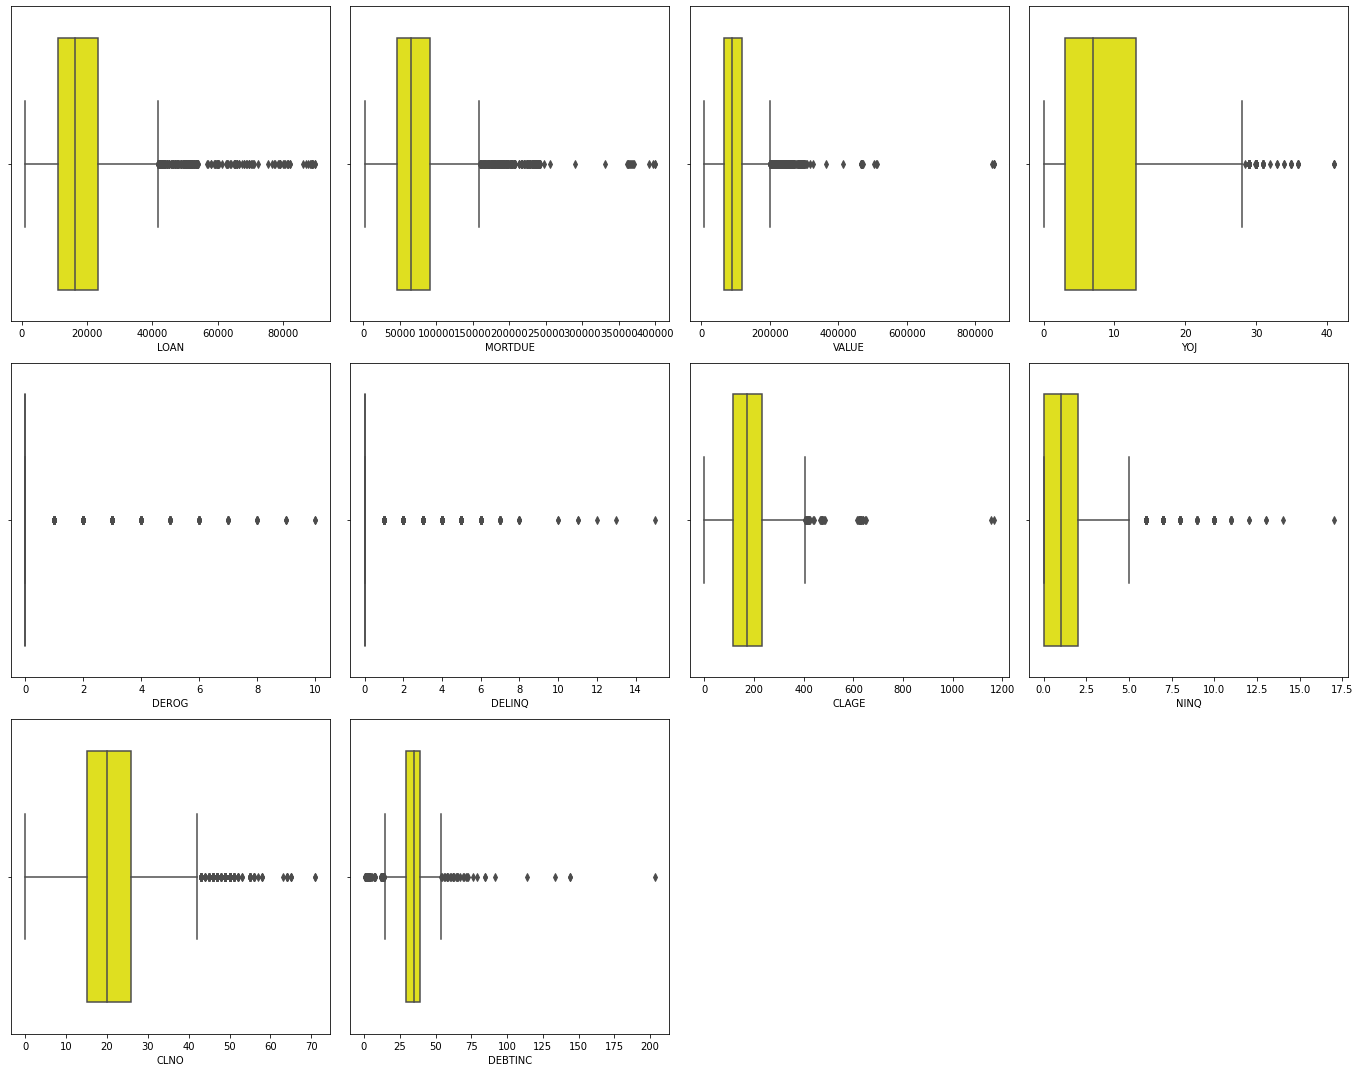

In [7]:
features=num.columns
plt.figure(figsize=(19,15))
for i in range(0, len(features)):
    plt.subplot(3,4,i+1)
    sn.boxplot(num[features[i]],color='yellow', orient='v')
    plt.tight_layout()

Dari gambar di atas, analisis univariate variabel numerik dengan boxplot menunjukan banyak outlier di hampir semua variabel.

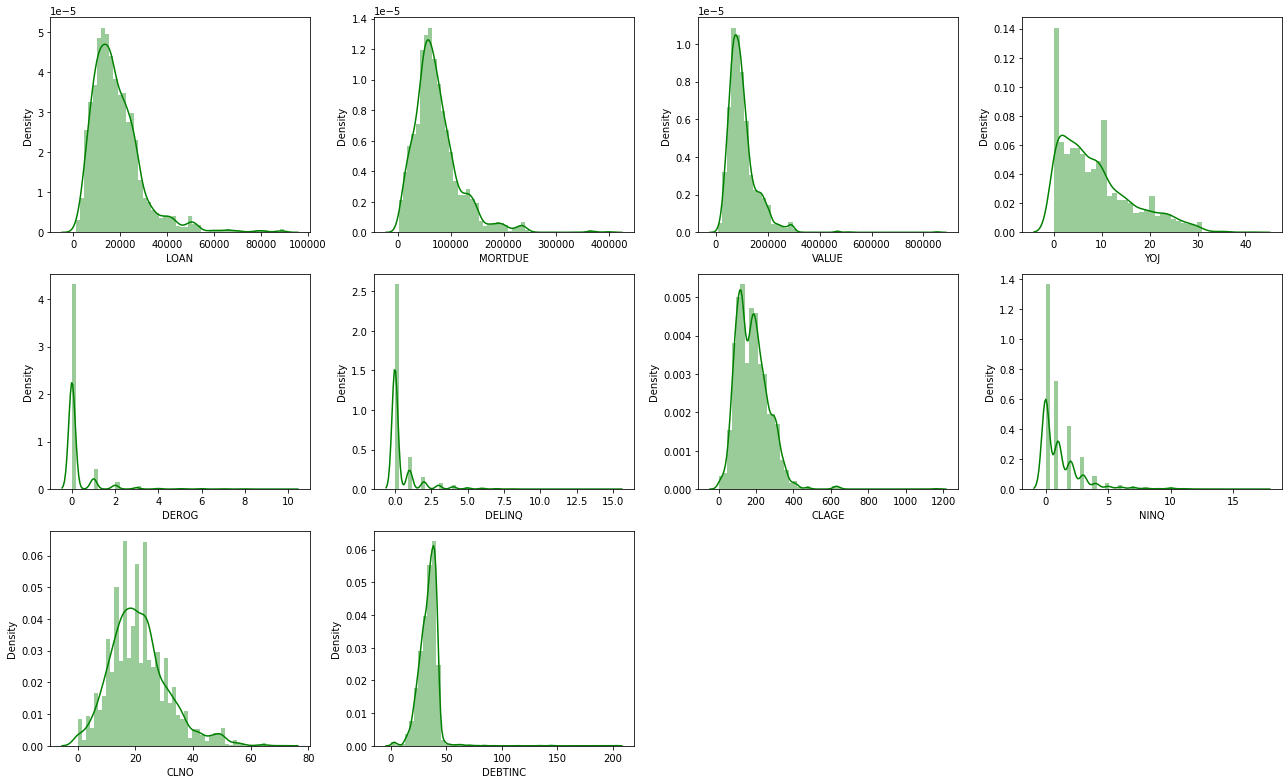

In [72]:
features=num.columns
plt.figure(figsize=(18,11))
for i in range(0, len(features)):
    plt.subplot(3,4,i+1)
    sn.distplot(num[features[i]],color='green')
    plt.tight_layout()

Mayoritas data tidak berdistribusi normal, dan menunjukan skew positif.

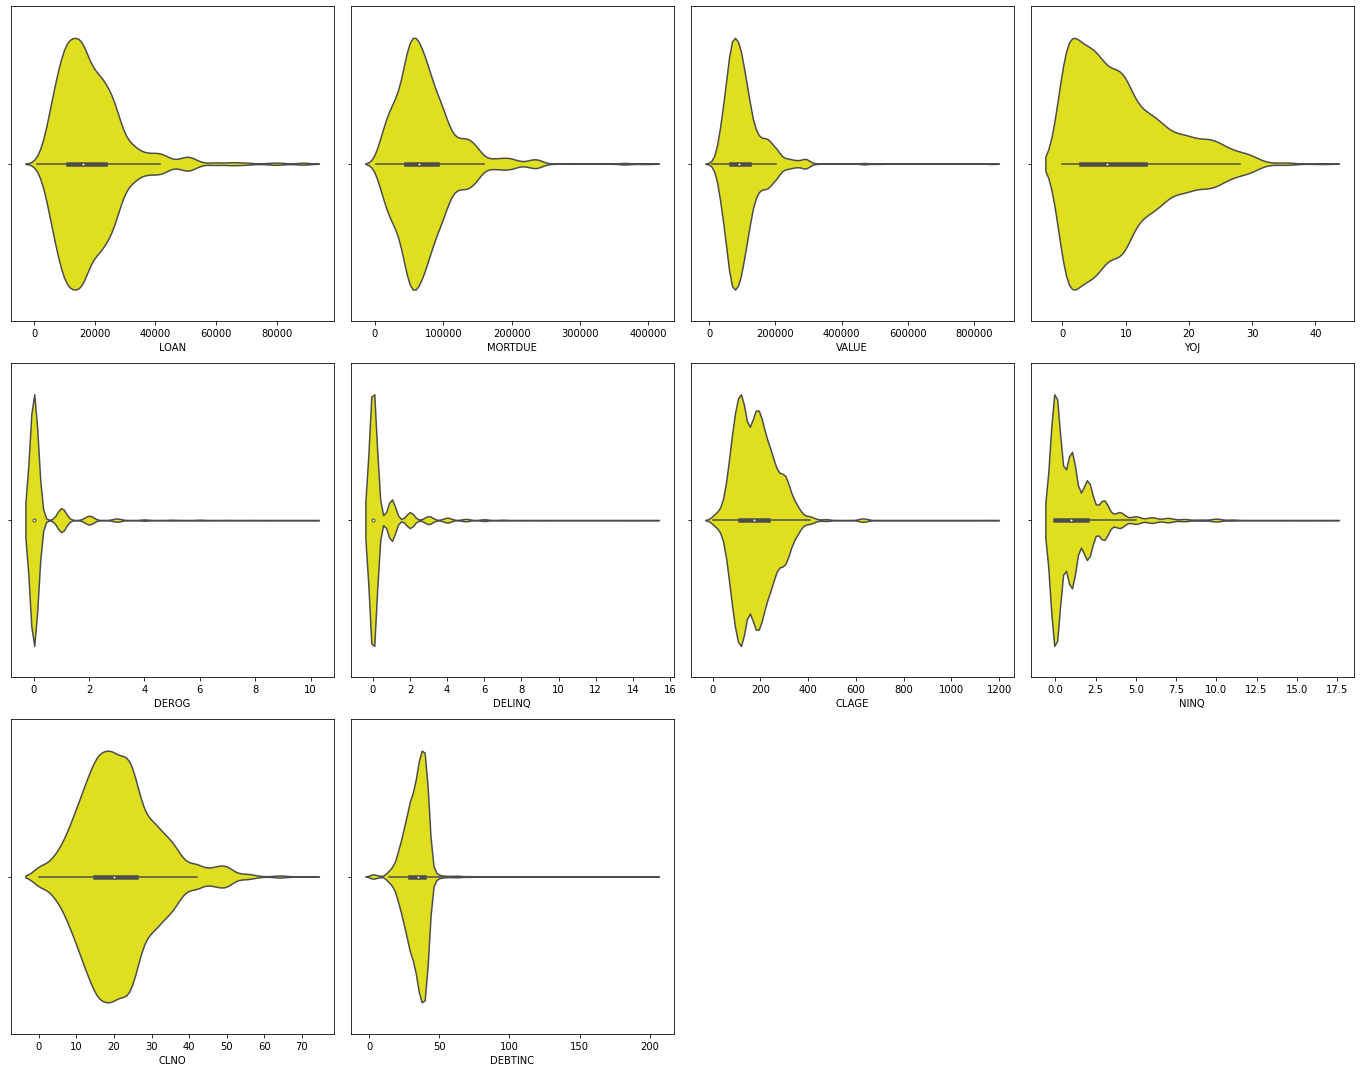

In [73]:
features=num.columns
plt.figure(figsize=(19,15))
for i in range(0, len(features)):
    plt.subplot(3,4,i+1)
    sn.violinplot(num[features[i]],color='yellow', orient='v')
    plt.tight_layout()

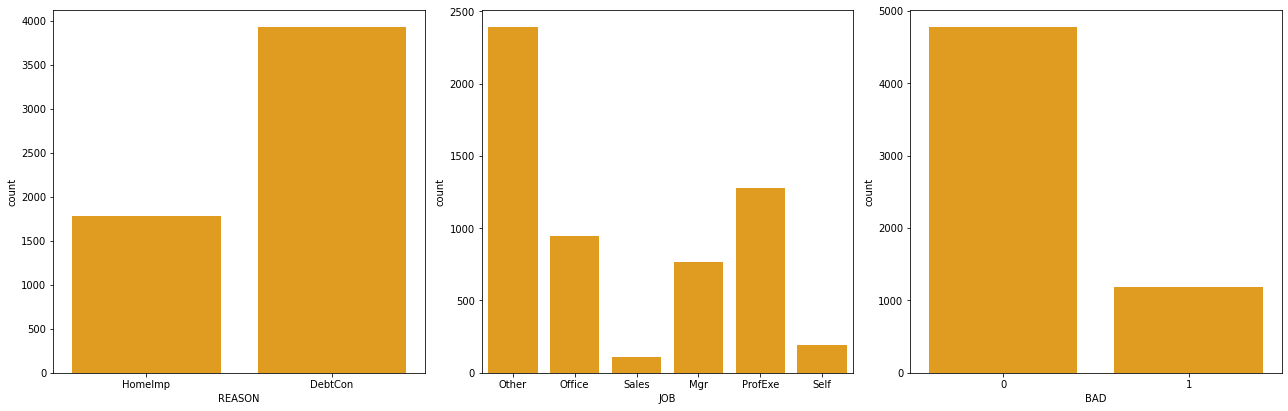

In [9]:
features=cat.columns
plt.figure(figsize=(18,11))
for i in range(0, len(features)):
    plt.subplot(2,3,i+1)
    sn.countplot(cat[features[i]],color='orange')
    plt.tight_layout()

Berdasarkan Gambar di atas, disimpulkan bahwa :
1. Jumlah peminjam yang defaluted loan masih jauh lebih kecil dibandingkan dengan  repaid loan dengan angka  1189 defaulted dan 4771 repaid. 
2. Jumlah pinjaman paling banyak digunakan untuk alasan pembayaran utang
3. Peminjam dengan pekerjaan paling banyak adalah other sedangkan yang paling kecil adalah sales dan self

 ## 2. Analisis data Bivariate

#### 1. Analisis Variabel  'BAD' dengan hubungan dengan variabel LOAN, MORTDUE, DELINQ, DEROG, dan VALUE

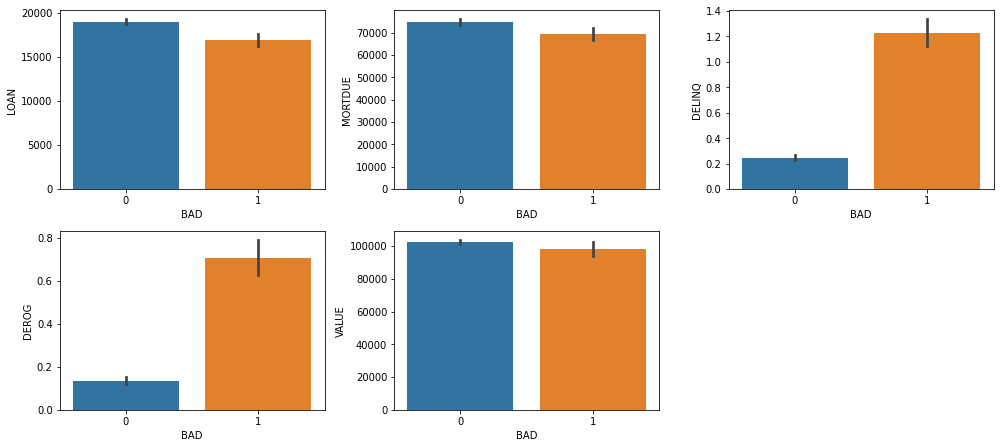

In [4]:
plt.figure(figsize=(14,12))
plt.subplot(4,3,1)
sn.barplot(df['BAD'],df['LOAN'])

plt.subplot(4,3,2)
sn.barplot(df['BAD'],df['MORTDUE'])  

plt.subplot(4,3,3)
sn.barplot(df['BAD'],df['DELINQ'])

plt.subplot(4,3,4)
sn.barplot(df['BAD'],df['DEROG'])

plt.subplot(4,3,5)
sn.barplot(df['BAD'],df['VALUE'])



plt.tight_layout()

Dari gambar di atas dapat disimpulkan bahwa:
    1. rata-rata jumlah pinjaman peminjam yang repaid loan sedikit lebih besar daripada yang defaulted
    2. rata-rata value property lebih besar dimiliki oleh peminjam yang berhasil melunasi pinjaman
    3. peminjam yang defaulted mempunyai rata-rata DEROG dan DELINQ (tingkat penundaan pembayaran) yang cukup besar
    4. peminjam yang repaid loan memiliki jumlah MORTDUE (cicilan) yang sedikit lebih besar daripada yang defaulted.

<AxesSubplot:xlabel='BAD', ylabel='count'>

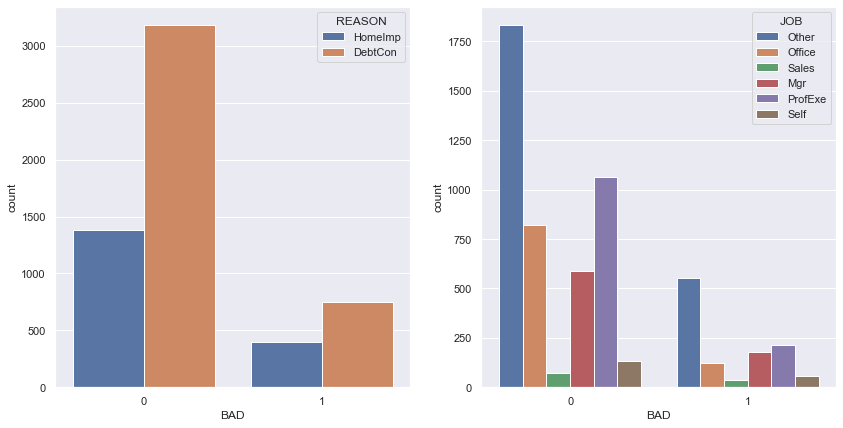

In [132]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sn.countplot(df['BAD'], hue=df['REASON'])

plt.subplot(1,2,2)
sn.countplot(df['BAD'], hue=df['JOB'])

Dari gambar di atas dapat disimpulkan bahwa:
    1. jumlah pinjaman peminjam yang repaid loan sedikit lebih besar daripada yang defaulted
    2. rata-rata value property lebih besar dimiliki oleh peminjam yang berhasil melunasi pinjaman
    3. peminjam yang defaulted mempunyai rata-rata DEROG dan DELINQ (tingkat penundaan pembayaran) yang cukup besar
    4. peminjam yang repaid loan memiliki jumlah MORTDUE (cicilan) yang sedikit lebih besar daripada yang defaulted.

### Tambahan analisis dengan variabel REASON dan JOB untuk melihat karakteristik Peminjam

## 2.2 Variable 'REASON'

Hubungan variable 'REASON dengan dengan variabel lainnya

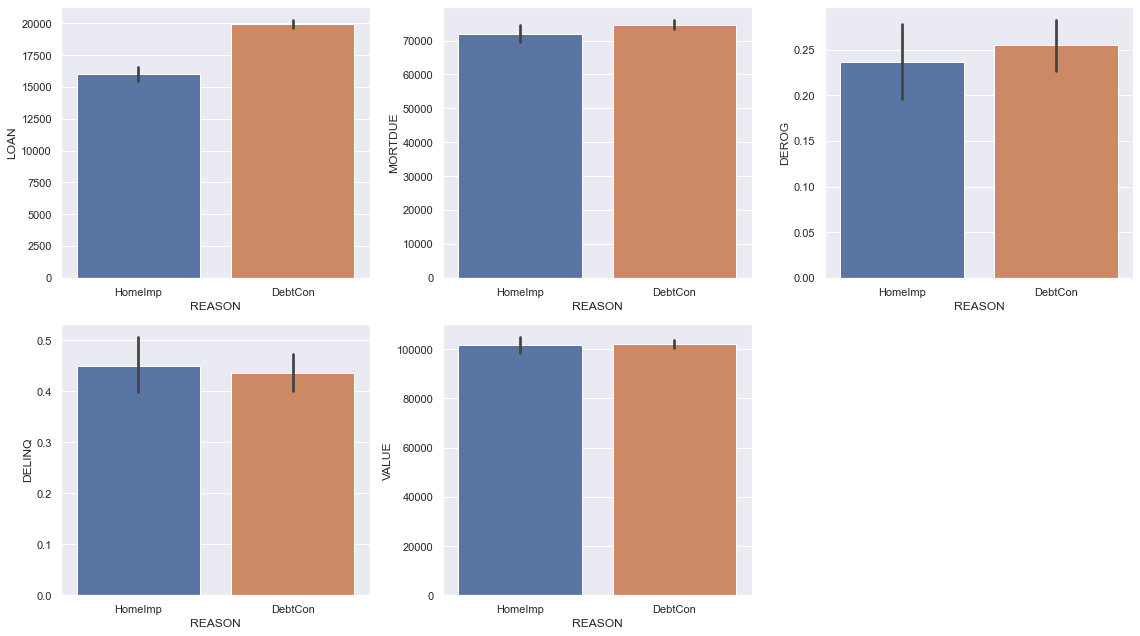

In [109]:
plt.figure(figsize=[16,9])

plt.subplot(2,3,1)
sn.barplot(df['REASON'], df['LOAN'])

plt.subplot(2,3,2)
sn.barplot(df['REASON'], df['MORTDUE'])

plt.subplot(2,3,3)
sn.barplot(df['REASON'], df['DEROG'])

plt.subplot(2,3,4)
sn.barplot(df['REASON'], df['DELINQ'])

plt.subplot(2,3,5)
sn.barplot(df['REASON'], df['VALUE'])

plt.tight_layout()

Dari gambar di atas dapat disimpulkan bahwa:
    1. rata-rata jumlah pinjaman digunakan untuk keperluan pembayaran kredit atau utang
    2. Pada nilai property, peminjam mempunyai jumlah rata2 yang sama value dengan kedua Reason tersebut.
    3. peminjam yang membayar utang (DebtCon) mempunyai jumlah rata2 nilai MORTDUE (cicilan) dan DEROG yang sedikit lebih besar daripada untuk Home Improvement         

### 2.3 Variable JOB

Analisis variabel JOB (Pekerjaan) dengan (mean) variabel lainnya.

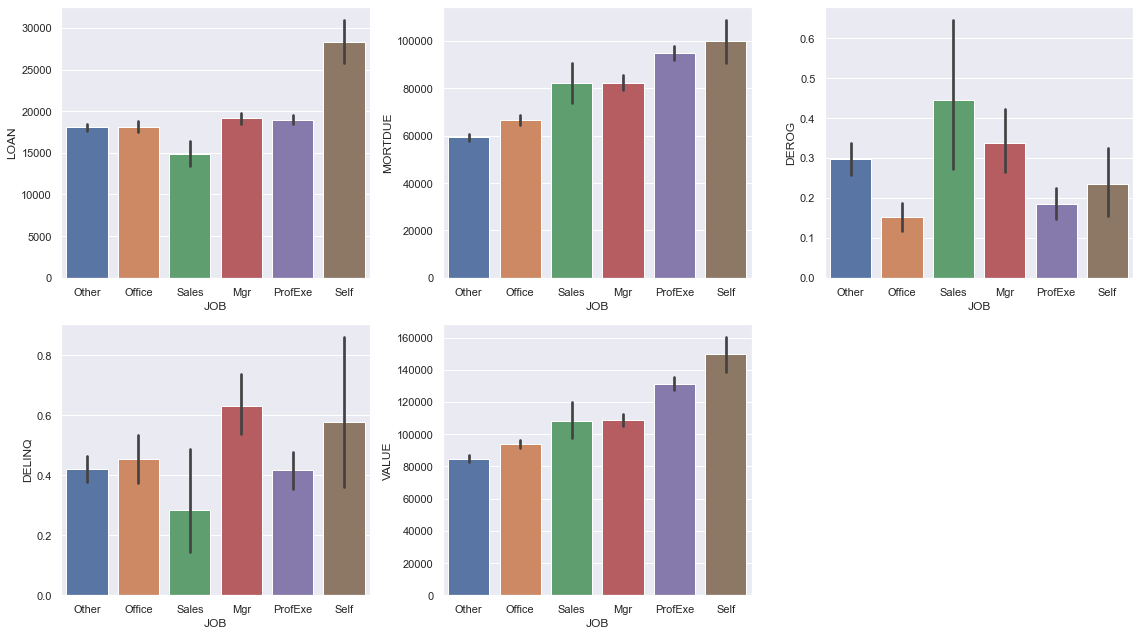

In [110]:
plt.figure(figsize=[16,9])

plt.subplot(2,3,1)
sn.barplot(df['JOB'], df['LOAN'])

plt.subplot(2,3,2)
sn.barplot(df['JOB'], df['MORTDUE'])

plt.subplot(2,3,3)
sn.barplot(df['JOB'], df['DEROG'])

plt.subplot(2,3,4)
sn.barplot(df['JOB'], df['DELINQ'])

plt.subplot(2,3,5)
sn.barplot(df['JOB'], df['VALUE'])

plt.tight_layout()

Dari gambar di atas dapat disimpulkan bahwa:
    1. Job (Self) memiliki rata-rata jumlah pinjaman, cicilan dan value property paling besar dibandingkan Job lainnya dimana other memiliki rata2 paling rendah.
    2. Sales memiliki tingkat DEROG (laporan permasalahan pembayaran) yang paling tinggi disusul dengan Mgr dan other. sedangkan pekerjaan office paling rendah
    3. Job Mgr dan Self memiliki DELINQ yang tinggi dibandingkan job lainnya, sedangkan sales paling rendah.

## 3. Analisis data Multivariate

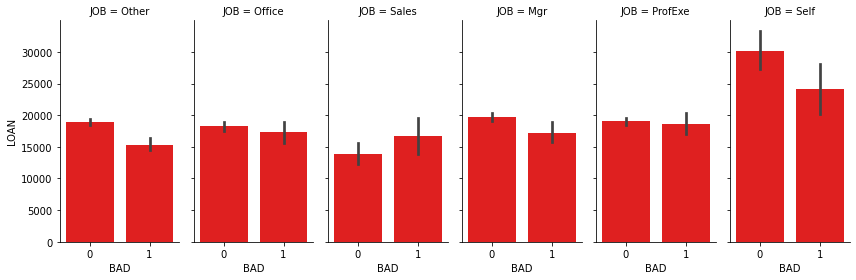

In [36]:
g = sn.FacetGrid(df, col='JOB', height=4, aspect=.5)
g.map(sn.barplot, 'BAD', 'LOAN', color='red')

In [33]:
df.groupby(['JOB','BAD'])['LOAN'].mean()

JOB      BAD
Mgr      0      19744.217687
         1      17220.670391
Office   0      18271.810450
         1      17292.000000
Other    0      18882.715376
         1      15343.682310
ProfExe  0      19045.676692
         1      18671.226415
Sales    0      13942.253521
         1      16728.947368
Self     0      30125.925926
         1      24098.275862
Name: LOAN, dtype: float64

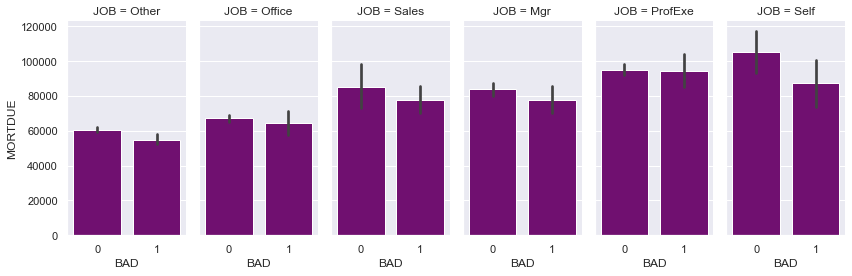

In [106]:
g = sn.FacetGrid(df, col='JOB', height=4, aspect=.5)
g.map(sn.barplot, 'BAD', 'MORTDUE', color='purple')

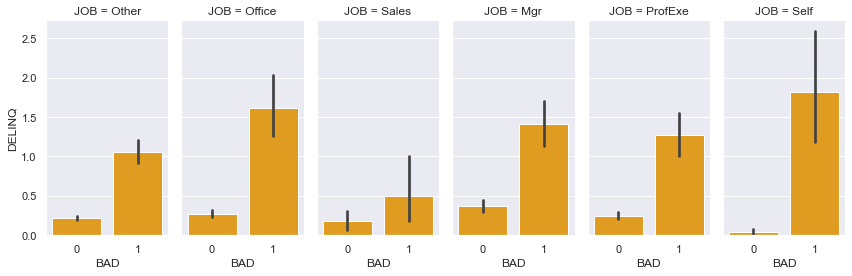

In [108]:
sn.set_theme()
g = sn.FacetGrid(df, col='JOB', height=4, aspect=.5, )
g.map(sn.barplot, 'BAD', 'DELINQ',color='orange')

Terdapat hubungan antara jumlah defaulted loan dengan jumlah DELINQ. Peminjam yang memeiliki DELINQ yang tinggi mempunyai peluang besar untuk Defaulted loan, dan Job Self menduduki posisi paling atas.

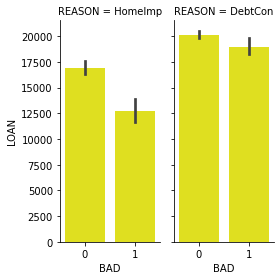

In [81]:
g = sn.FacetGrid(df, col='REASON', height=4, aspect=.5, )
g.map(sn.barplot, 'BAD', 'LOAN',color='yellow')

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

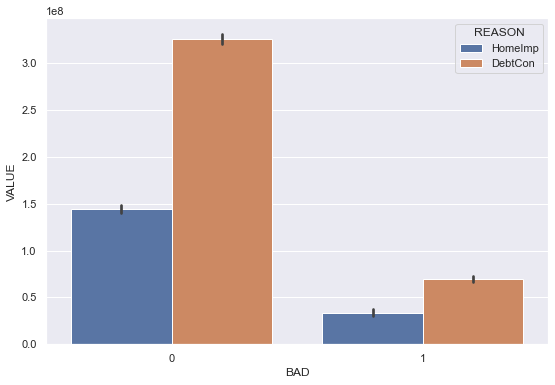

In [113]:
plt.figure(figsize=[9,6])
sn.barplot(df['BAD'], df['VALUE'],hue=df['REASON'], estimator=sum)

Jumlah total peminjam yang memiliki Total value property yang tinggi, mengambil pinjaman  untuk Debt Cosolidation (pembayaran utang)

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

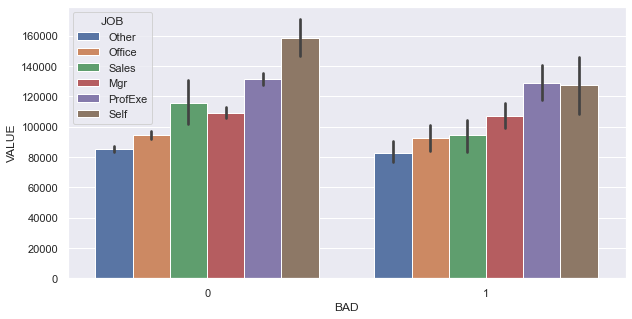

In [114]:
plt.figure(figsize=[10,5])
sn.barplot(df['BAD'], df['VALUE'],hue=df['JOB'])

Dari gambar di atas dapat dilihat bahwa peminjam dengan berbagai JOB yang memiliki value property yang tinggi sedikit cenderung untuk melakukan repaid loan daripada peminjam yang defaulted loan.

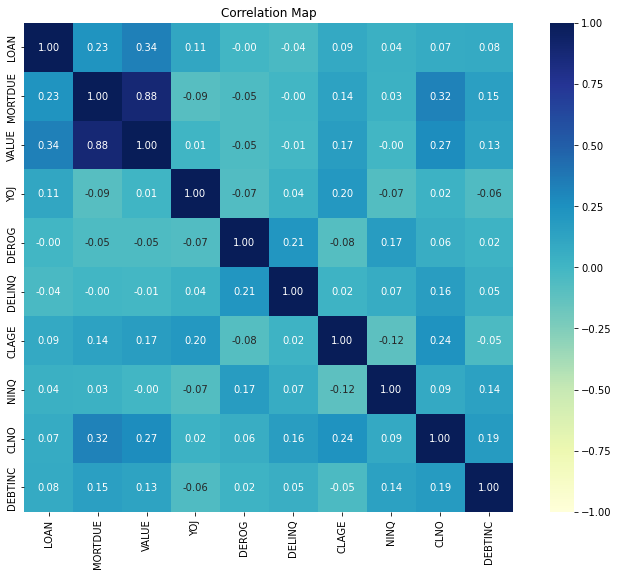

In [61]:
cr=num.corr()
plt.figure(figsize=(13,9))
sn.heatmap(cr, annot=True,fmt='.2f',cmap='YlGnBu',vmin=-1,vmax=1, square=True)
plt.xticks(rotation=90)
plt.title('Correlation Map')
plt.show()

Dari hasil korelasi di atas dapat disimpulkan bahwa terdapat 2 variabel yang berkorelasi kuat yaitu MORTDUE(cicilan) dengan VALUE (nilai property)

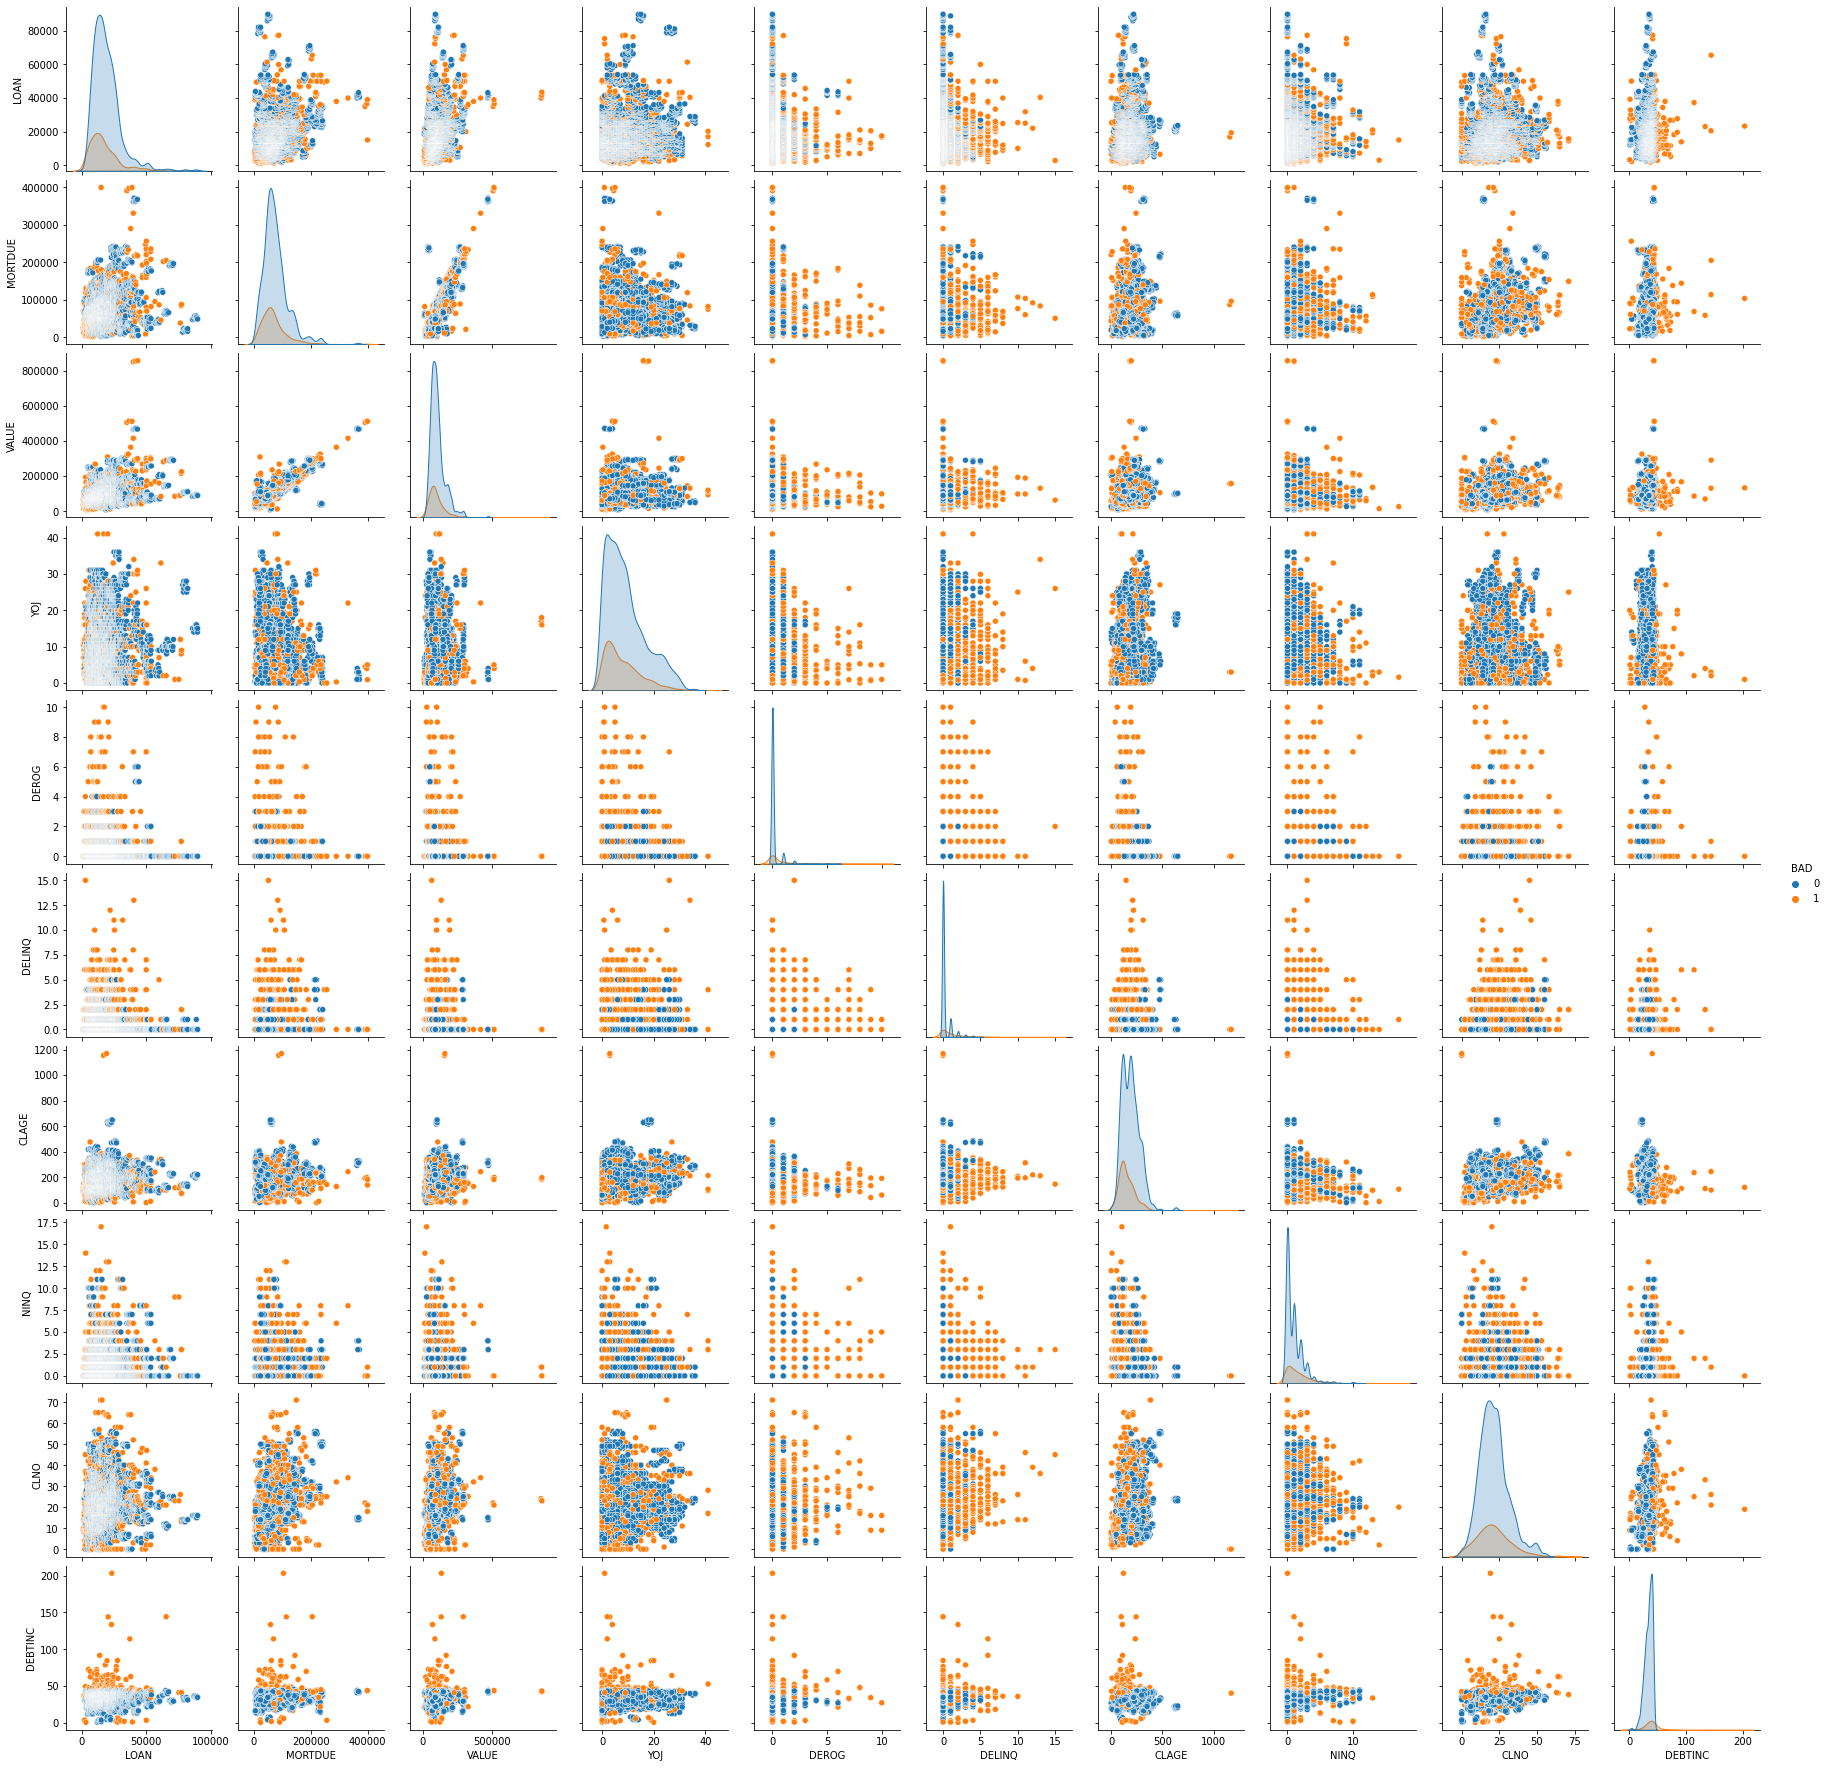

In [70]:
sn.pairplot(df,diag_kind='kde', hue='BAD')

<AxesSubplot:xlabel='JOB', ylabel='YOJ'>

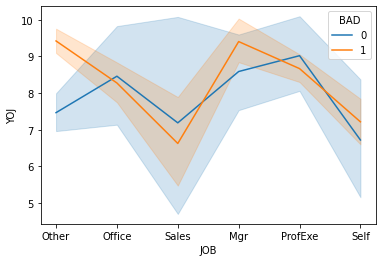

In [373]:
sn.lineplot(df['JOB'], df['YOJ'], hue=df['BAD'])

# Data Preprocessing

### Mengecek missing values

In [ ]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

Terdapat beberapa kolom dengan missing values

In [ ]:
for col in df.columns:
  msg = 'column: {:>7}\t percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
  print(msg)

column:     BAD	 percent of NaN value: 0.00%
column:    LOAN	 percent of NaN value: 0.00%
column: MORTDUE	 percent of NaN value: 8.69%
column:   VALUE	 percent of NaN value: 1.88%
column:  REASON	 percent of NaN value: 4.23%
column:     JOB	 percent of NaN value: 4.68%
column:     YOJ	 percent of NaN value: 8.64%
column:   DEROG	 percent of NaN value: 11.88%
column:  DELINQ	 percent of NaN value: 9.73%
column:   CLAGE	 percent of NaN value: 5.17%
column:    NINQ	 percent of NaN value: 8.56%
column:    CLNO	 percent of NaN value: 3.72%
column: DEBTINC	 percent of NaN value: 21.26%


In [ ]:
df['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

Karena data imbalanced maka diusahakan kita tidak akan mendrop missing values

In [ ]:
df.DEROG.unique()

array([ 0., nan,  3.,  2.,  1.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

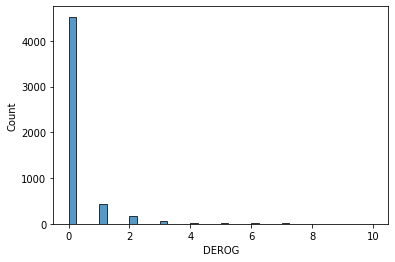

In [ ]:
sns.histplot(df['DEROG'], bins=40)
plt.show()

In [ ]:
df['DEROG'].describe()

count    5252.000000
mean        0.254570
std         0.846047
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: DEROG, dtype: float64

kita akan impute variabel DEROG dengan nilai mediannya

In [ ]:
df['DEBTINC'].unique()

array([        nan, 37.11361356, 36.88489409, ..., 35.55659049,
       34.34088237, 34.57151913])

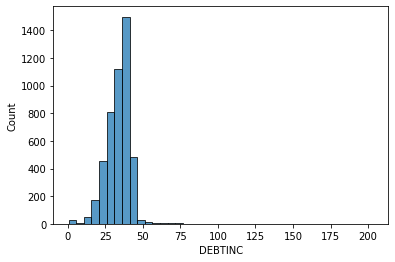

In [ ]:
sns.histplot(df['DEBTINC'], bins=40)
plt.show()

In [ ]:
df['DEBTINC'].describe()

count    4693.000000
mean       33.779915
std         8.601746
min         0.524499
25%        29.140031
50%        34.818262
75%        39.003141
max       203.312149
Name: DEBTINC, dtype: float64

kita akan impute variabel DEBTINC dengan nilai mediannya

## Mengecek variabel kategorik

In [ ]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [ ]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [90]:
# Change REASON value
df.loc[df['REASON'] == 'DebtCon', 'REASON'] = 0
df.loc[df['REASON'] == 'HomeImp', 'REASON'] = 1

In [91]:
# Change REASON value
df.loc[df['BAD'] == 1, 'BAD'] = 2
df.loc[df['BAD'] == 0, 'BAD'] = 1
df.loc[df['BAD'] == 2, 'BAD'] = 0

In [92]:
df['BAD'].value_counts()

1    4771
0    1189
Name: BAD, dtype: int64

## Impute Missing Values

In [ ]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

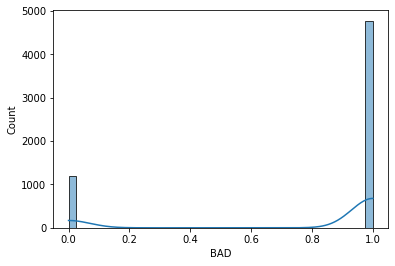

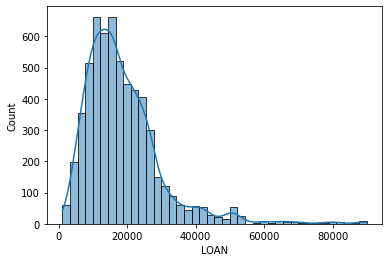

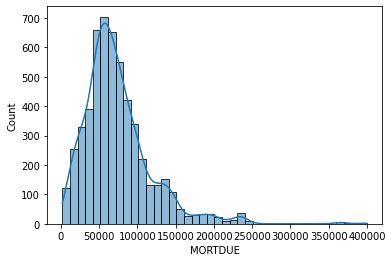

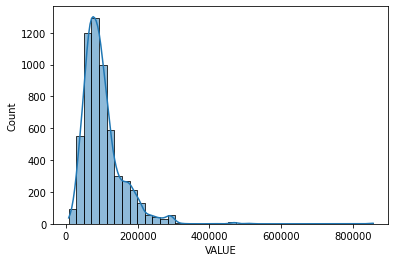

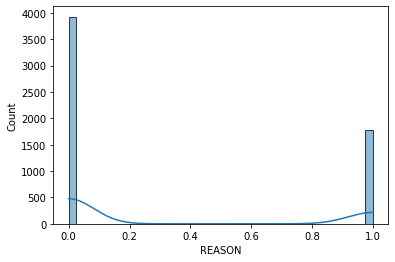

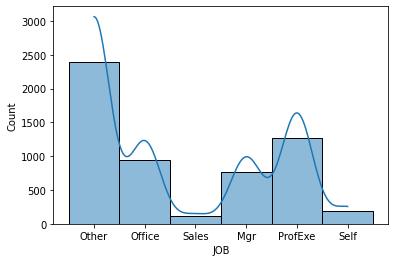

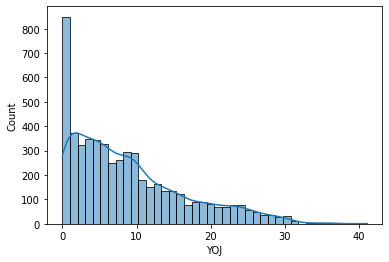

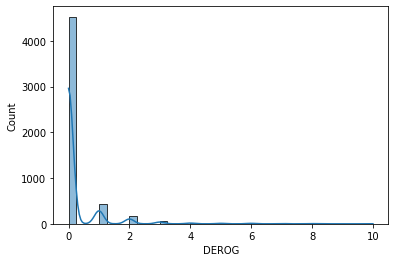

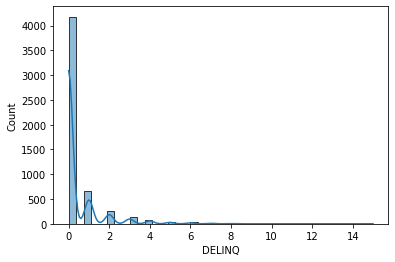

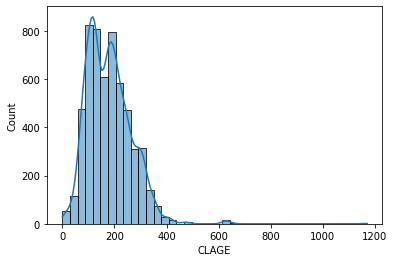

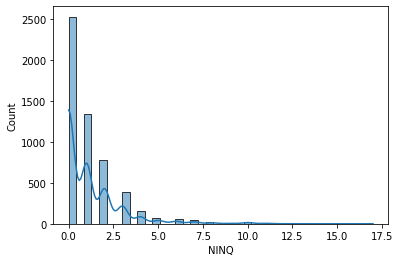

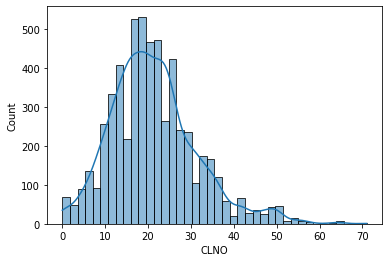

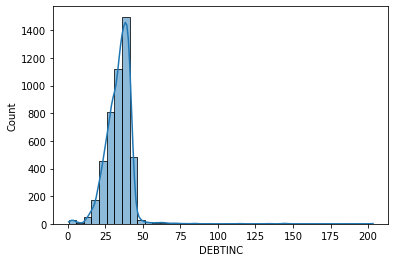

In [ ]:
for col in df.columns:
  sns.histplot(df[col],bins=40,kde=True)
  plt.show()

Tidak ada variabel yang menyebar normal

In [ ]:
df['JOB'].mode()

0    Other
dtype: object

In [93]:
df['DEROG'].fillna(df['DEROG'].median(), inplace=True)
df['DEBTINC'].fillna(df['DEBTINC'].median(), inplace=True)
df['MORTDUE'].fillna(df['MORTDUE'].median(), inplace=True)
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)
df['REASON'].fillna(df['REASON'].median(), inplace=True)
df['JOB'].fillna('Other', inplace=True)
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)
df['DELINQ'].fillna(df['DELINQ'].median(), inplace=True)
df['CLAGE'].fillna(df['CLAGE'].median(), inplace=True)
df['NINQ'].fillna(df['NINQ'].median(), inplace=True)
df['CLNO'].fillna(df['CLNO'].median(), inplace=True)

In [94]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [95]:
df['REASON'] = df['REASON'].astype('int')

In [ ]:
df.shape

(5960, 13)

In [96]:
df.duplicated().sum()

0

Tidak ada yang duplikat

# Data Preparation

In [97]:
data = df.copy()
data.shape

(5960, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   int64  
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 605.4+ KB


In [98]:
data['BAD'].value_counts()

1    4771
0    1189
Name: BAD, dtype: int64

In [ ]:
data.corr()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,0.075099,0.046186,0.036492,-0.037517,0.053956,-0.269921,-0.346503,0.165614,-0.170031,0.004543,-0.154544
LOAN,0.075099,1.000000,0.216380,0.331522,-0.151477,0.096878,0.006996,-0.028869,0.088237,0.045266,0.074317,0.068938
MORTDUE,0.046186,0.216380,1.000000,0.788736,-0.029882,-0.076201,-0.047123,0.003580,0.129799,0.032582,0.318515,0.134575
VALUE,0.036492,0.331522,0.788736,1.000000,-0.001020,0.013638,-0.043808,-0.008158,0.169536,-0.002539,0.265029,0.113080
REASON,-0.037517,-0.151477,-0.029882,-0.001020,1.000000,0.046524,-0.008406,0.004024,0.049966,-0.116128,-0.107034,-0.031196
YOJ,0.053956,0.096878,-0.076201,0.013638,0.046524,1.000000,-0.057729,0.051580,0.186203,-0.062837,0.032815,-0.046482
DEROG,-0.269921,0.006996,-0.047123,-0.043808,-0.008406,-0.057729,1.000000,0.171286,-0.079482,0.146590,0.052075,0.020542
DELINQ,-0.346503,-0.028869,0.003580,-0.008158,0.004024,0.051580,0.171286,1.000000,0.026324,0.059194,0.161153,0.048307
CLAGE,0.165614,0.088237,0.129799,0.169536,0.049966,0.186203,-0.079482,0.026324,1.000000,-0.109736,0.233802,-0.040741
NINQ,-0.170031,0.045266,0.032582,-0.002539,-0.116128,-0.062837,0.146590,0.059194,-0.109736,1.000000,0.085912,0.120310


*   Variabel MORTDUE dan VALUE memiliki korelasi yang tinggi
*   Tidak ada variabel yang berkorelasi tinggi dengan target



## Export clean data

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1100,25860.0,39025.0,1,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,0,1300,70053.0,68400.0,1,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,0,1500,13500.0,16700.0,1,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,0,1500,65019.0,89235.5,0,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,1,1700,97800.0,112000.0,1,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [ ]:
data.to_csv(PATH+'clean_data_credit_scoring_hmeq.csv')

# Additional Transformation Class

In [99]:
class LogTransform():
    def __init__(self):
        pass

    def fit(self, X):
        return self
    
    def transform(self, X):
        return np.log(X+1)

    def inverse_transform(self, X):
        return np.exp(X)-1

class SQRTTransform():
    def __init__(self):
        pass

    def fit(self, X):
        return self
    
    def transform(self, X):
        return np.sqrt(X)

    def inverse_transform(self, X):
        return np.power(X,2)

# Data Modelling 


1.   Case dengan variabel default dan parameter default
2.   List item



In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1100,25860.0,39025.0,1,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,0,1300,70053.0,68400.0,1,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,0,1500,13500.0,16700.0,1,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,0,1500,65019.0,89235.5,0,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,1,1700,97800.0,112000.0,1,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [ ]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [100]:
dataset = pd.get_dummies(data, columns = ['JOB'])
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1100,25860.0,39025.0,1,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,0,0,1,0,0,0
1,0,1300,70053.0,68400.0,1,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,0,0,1,0,0,0
2,0,1500,13500.0,16700.0,1,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,0,0,1,0,0,0
3,0,1500,65019.0,89235.5,0,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0
4,1,1700,97800.0,112000.0,1,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,0,1,0,0,0,0


# Split Data

In [101]:
x, y = dataset.drop('BAD', axis=1), dataset['BAD']

In [ ]:
x.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.00,39025.00,1,10.50,0.00,0.00,94.37,1.00,9.00,34.82,0,0,1,0,0,0
1,1300,70053.00,68400.00,1,7.00,0.00,2.00,121.83,0.00,14.00,34.82,0,0,1,0,0,0
2,1500,13500.00,16700.00,1,4.00,0.00,0.00,149.47,1.00,10.00,34.82,0,0,1,0,0,0
3,1500,65019.00,89235.50,0,7.00,0.00,0.00,173.47,1.00,20.00,34.82,0,0,1,0,0,0
4,1700,97800.00,112000.00,1,3.00,0.00,0.00,93.33,0.00,14.00,34.82,0,1,0,0,0,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: BAD, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [ ]:
X_train.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2015,12900,61031.00,71550.00,1,28.00,0.00,2.00,178.09,0.00,23.00,34.80,0,0,1,0,0,0
2567,15000,122486.00,159000.00,0,5.00,0.00,0.00,137.00,1.00,21.00,34.82,0,1,0,0,0,0
399,6500,63144.00,76754.00,1,2.00,0.00,2.00,129.08,0.00,23.00,29.06,1,0,0,0,0,0
638,7900,77221.00,95316.00,0,4.00,0.00,0.00,116.31,0.00,25.00,35.43,0,0,0,1,0,0
1832,12300,90006.00,121122.00,0,9.00,0.00,0.00,133.50,1.00,21.00,36.91,0,1,0,0,0,0


### Case 1
Default Parameter tanpa OverSampling

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:10<00:00,  2.85it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.85,0.85,0.92,0.71
LabelPropagation,0.93,0.84,0.84,0.93,1.23
LabelSpreading,0.93,0.84,0.84,0.93,1.80
ExtraTreesClassifier,0.93,0.84,0.84,0.93,0.50
LGBMClassifier,0.92,0.84,0.84,0.92,0.25
RandomForestClassifier,0.92,0.83,0.83,0.91,0.89
BaggingClassifier,0.89,0.82,0.82,0.89,0.30
DecisionTreeClassifier,0.87,0.79,0.79,0.87,0.09
AdaBoostClassifier,0.89,0.78,0.78,0.88,0.37


#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_mm = sc.fit_transform(X_train)
X_test_mm = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_mm, X_test_mm, y_train, y_test)
models

100%|██████████| 29/29 [00:09<00:00,  2.93it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.85,0.85,0.92,0.58
LabelPropagation,0.93,0.84,0.84,0.93,1.20
LabelSpreading,0.93,0.84,0.84,0.93,1.73
ExtraTreesClassifier,0.93,0.84,0.84,0.93,0.50
LGBMClassifier,0.92,0.84,0.84,0.92,0.23
RandomForestClassifier,0.92,0.83,0.83,0.91,0.89
BaggingClassifier,0.89,0.82,0.82,0.89,0.30
DecisionTreeClassifier,0.87,0.79,0.79,0.87,0.09
AdaBoostClassifier,0.89,0.78,0.78,0.88,0.34


#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_ss, X_test_ss, y_train, y_test)
models

100%|██████████| 29/29 [00:09<00:00,  2.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.85,0.85,0.92,0.56
LabelPropagation,0.93,0.84,0.84,0.93,1.19
LabelSpreading,0.93,0.84,0.84,0.93,1.72
ExtraTreesClassifier,0.93,0.84,0.84,0.93,0.50
LGBMClassifier,0.92,0.84,0.84,0.92,0.25
RandomForestClassifier,0.92,0.83,0.83,0.91,0.89
BaggingClassifier,0.89,0.82,0.82,0.89,0.29
DecisionTreeClassifier,0.87,0.79,0.79,0.87,0.09
AdaBoostClassifier,0.89,0.78,0.78,0.88,0.35


#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_rs = sc.fit_transform(X_train)
X_test_rs = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_rs, X_test_rs, y_train, y_test)
models

100%|██████████| 29/29 [00:09<00:00,  2.94it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.85,0.85,0.92,0.56
LabelPropagation,0.93,0.84,0.84,0.93,1.19
LabelSpreading,0.93,0.84,0.84,0.93,1.73
ExtraTreesClassifier,0.93,0.84,0.84,0.93,0.49
LGBMClassifier,0.92,0.84,0.84,0.92,0.28
RandomForestClassifier,0.92,0.83,0.83,0.91,0.90
BaggingClassifier,0.89,0.82,0.82,0.89,0.31
DecisionTreeClassifier,0.87,0.79,0.79,0.87,0.10
AdaBoostClassifier,0.89,0.78,0.78,0.88,0.36


#### Log Transform

In [ ]:
X_train.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2015,12900,61031.00,71550.00,1,28.00,0.00,2.00,178.09,0.00,23.00,34.80,0,0,1,0,0,0
2567,15000,122486.00,159000.00,0,5.00,0.00,0.00,137.00,1.00,21.00,34.82,0,1,0,0,0,0
399,6500,63144.00,76754.00,1,2.00,0.00,2.00,129.08,0.00,23.00,29.06,1,0,0,0,0,0
638,7900,77221.00,95316.00,0,4.00,0.00,0.00,116.31,0.00,25.00,35.43,0,0,0,1,0,0
1832,12300,90006.00,121122.00,0,9.00,0.00,0.00,133.50,1.00,21.00,36.91,0,1,0,0,0,0


In [ ]:
sc = LogTransform()
X_train_log = sc.transform(X_train)
X_test_log = sc.transform(X_test)

In [ ]:
X_train_log.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
2015,9.47,11.02,11.18,0.69,3.37,0.00,1.10,5.19,0.00,3.18,3.58,0.00,0.00,0.69,0.00,0.00,0.00
2567,9.62,11.72,11.98,0.00,1.79,0.00,0.00,4.93,0.69,3.09,3.58,0.00,0.69,0.00,0.00,0.00,0.00
399,8.78,11.05,11.25,0.69,1.10,0.00,1.10,4.87,0.00,3.18,3.40,0.69,0.00,0.00,0.00,0.00,0.00
638,8.97,11.25,11.46,0.00,1.61,0.00,0.00,4.76,0.00,3.26,3.60,0.00,0.00,0.00,0.69,0.00,0.00
1832,9.42,11.41,11.70,0.00,2.30,0.00,0.00,4.90,0.69,3.09,3.64,0.00,0.69,0.00,0.00,0.00,0.00


In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_log, X_test_log, y_train, y_test)
models

100%|██████████| 29/29 [00:10<00:00,  2.89it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.92,0.85,0.85,0.92,0.56
ExtraTreesClassifier,0.93,0.84,0.84,0.93,0.50
LGBMClassifier,0.92,0.84,0.84,0.92,0.25
RandomForestClassifier,0.92,0.83,0.83,0.91,0.90
LabelPropagation,0.93,0.83,0.83,0.92,1.24
LabelSpreading,0.93,0.83,0.83,0.92,1.80
BaggingClassifier,0.89,0.82,0.82,0.89,0.29
DecisionTreeClassifier,0.87,0.79,0.79,0.87,0.10
AdaBoostClassifier,0.89,0.78,0.78,0.88,0.34


#### Sqrt Transform

In [ ]:
sc = SQRTTransform()
X_train_sqrt = sc.transform(X_train)
X_test_sqrt = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_sqrt, X_test_sqrt, y_train, y_test)
models

100%|██████████| 29/29 [00:09<00:00,  2.90it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.92,0.85,0.85,0.92,0.24
XGBClassifier,0.92,0.85,0.85,0.92,0.56
ExtraTreesClassifier,0.94,0.84,0.84,0.93,0.51
LabelPropagation,0.93,0.84,0.84,0.93,1.25
LabelSpreading,0.93,0.84,0.84,0.93,1.79
RandomForestClassifier,0.92,0.83,0.83,0.91,0.90
BaggingClassifier,0.89,0.82,0.82,0.89,0.29
DecisionTreeClassifier,0.87,0.79,0.79,0.87,0.09
ExtraTreeClassifier,0.88,0.78,0.78,0.88,0.02


## Dengan OverSampling

In [ ]:
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1100,25860.00,39025.00,1,10.50,0.00,0.00,94.37,1.00,9.00,34.82,0,0,1,0,0,0
1,0,1300,70053.00,68400.00,1,7.00,0.00,2.00,121.83,0.00,14.00,34.82,0,0,1,0,0,0
2,0,1500,13500.00,16700.00,1,4.00,0.00,0.00,149.47,1.00,10.00,34.82,0,0,1,0,0,0
3,0,1500,65019.00,89235.50,0,7.00,0.00,0.00,173.47,1.00,20.00,34.82,0,0,1,0,0,0
4,1,1700,97800.00,112000.00,1,3.00,0.00,0.00,93.33,0.00,14.00,34.82,0,1,0,0,0,0


In [103]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [104]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over, X_test, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:19<00:00,  1.49it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.94,0.87,0.87,0.94,0.60
LabelPropagation,0.94,0.86,0.86,0.94,2.66
LabelSpreading,0.94,0.86,0.86,0.94,4.30
XGBClassifier,0.92,0.86,0.86,0.92,0.98
RandomForestClassifier,0.92,0.85,0.85,0.92,1.24
BaggingClassifier,0.90,0.85,0.85,0.90,0.44
LGBMClassifier,0.92,0.85,0.85,0.92,0.41
ExtraTreeClassifier,0.88,0.80,0.80,0.88,0.03
AdaBoostClassifier,0.88,0.80,0.80,0.88,0.55


#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_mm = sc.fit_transform(X_train_over)
X_test_mm = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_mm, X_test_mm, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.49it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.94,0.87,0.87,0.94,0.61
LabelPropagation,0.94,0.86,0.86,0.94,2.68
LabelSpreading,0.94,0.86,0.86,0.94,4.15
XGBClassifier,0.92,0.86,0.86,0.92,0.99
RandomForestClassifier,0.92,0.85,0.85,0.92,1.24
BaggingClassifier,0.90,0.85,0.85,0.90,0.44
LGBMClassifier,0.92,0.85,0.85,0.92,0.39
ExtraTreeClassifier,0.88,0.80,0.80,0.88,0.03
AdaBoostClassifier,0.88,0.80,0.80,0.88,0.54


#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_over_ss = sc.fit_transform(X_train_over)
X_test_ss = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_ss, X_test_ss, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.50it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.94,0.87,0.87,0.94,0.61
LabelPropagation,0.94,0.86,0.86,0.94,2.68
LabelSpreading,0.94,0.86,0.86,0.94,4.14
XGBClassifier,0.92,0.86,0.86,0.92,0.96
RandomForestClassifier,0.92,0.85,0.85,0.92,1.21
BaggingClassifier,0.90,0.85,0.85,0.90,0.42
LGBMClassifier,0.92,0.85,0.85,0.92,0.37
ExtraTreeClassifier,0.88,0.80,0.80,0.88,0.03
AdaBoostClassifier,0.88,0.80,0.80,0.88,0.54


#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_over_rs = sc.fit_transform(X_train_over)
X_test_rs = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_rs, X_test_rs, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.51it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.94,0.87,0.87,0.94,0.60
LabelPropagation,0.94,0.86,0.86,0.94,2.68
LabelSpreading,0.94,0.86,0.86,0.94,4.10
XGBClassifier,0.92,0.86,0.86,0.92,0.96
RandomForestClassifier,0.92,0.85,0.85,0.92,1.24
BaggingClassifier,0.90,0.85,0.85,0.90,0.41
LGBMClassifier,0.92,0.85,0.85,0.92,0.40
ExtraTreeClassifier,0.88,0.80,0.80,0.88,0.03
AdaBoostClassifier,0.88,0.80,0.80,0.88,0.54


#### Log Transform

In [ ]:
sc = LogTransform()
X_train_over_log = sc.transform(X_train_over)
X_test_log = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_log, X_test_log, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.47it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.94,0.86,0.86,0.94,0.62
XGBClassifier,0.92,0.86,0.86,0.92,1.00
RandomForestClassifier,0.92,0.86,0.86,0.92,1.22
BaggingClassifier,0.90,0.85,0.85,0.90,0.44
LGBMClassifier,0.92,0.84,0.84,0.92,0.37
LabelSpreading,0.93,0.84,0.84,0.93,4.33
LabelPropagation,0.93,0.84,0.84,0.93,2.79
AdaBoostClassifier,0.88,0.80,0.80,0.88,0.54
KNeighborsClassifier,0.91,0.79,0.79,0.90,0.34


#### Sqrt Transform

In [ ]:
sc = SQRTTransform()
X_train_over_sqrt = sc.transform(X_train_over)
X_test_sqrt = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_sqrt, X_test_sqrt, y_train_over, y_test)
models

100%|██████████| 29/29 [00:18<00:00,  1.58it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.93,0.87,0.87,0.93,1.32
LabelPropagation,0.94,0.86,0.86,0.94,2.48
LabelSpreading,0.94,0.86,0.86,0.94,3.74
ExtraTreesClassifier,0.94,0.86,0.86,0.94,0.60
XGBClassifier,0.93,0.86,0.86,0.93,0.99
LGBMClassifier,0.93,0.86,0.86,0.93,0.37
BaggingClassifier,0.90,0.84,0.84,0.90,0.46
DecisionTreeClassifier,0.87,0.80,0.80,0.87,0.12
ExtraTreeClassifier,0.87,0.80,0.80,0.87,0.03


## Dengan UnderSampling

In [ ]:
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1100,25860.00,39025.00,1,10.50,0.00,0.00,94.37,1.00,9.00,34.82,0,0,1,0,0,0
1,0,1300,70053.00,68400.00,1,7.00,0.00,2.00,121.83,0.00,14.00,34.82,0,0,1,0,0,0
2,0,1500,13500.00,16700.00,1,4.00,0.00,0.00,149.47,1.00,10.00,34.82,0,0,1,0,0,0
3,0,1500,65019.00,89235.50,0,7.00,0.00,0.00,173.47,1.00,20.00,34.82,0,0,1,0,0,0
4,1,1700,97800.00,112000.00,1,3.00,0.00,0.00,93.33,0.00,14.00,34.82,0,1,0,0,0,0


In [105]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_under , predictions = clf.fit(X_train_under, X_test, y_train_under, y_test)
models_under

100%|██████████| 29/29 [00:04<00:00,  6.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.89,0.89,0.91,0.32
XGBClassifier,0.89,0.88,0.88,0.89,0.25
RandomForestClassifier,0.89,0.88,0.88,0.89,0.46
LGBMClassifier,0.89,0.87,0.87,0.89,0.20
LabelSpreading,0.90,0.85,0.85,0.90,0.41
LabelPropagation,0.90,0.85,0.85,0.90,0.31
BaggingClassifier,0.84,0.84,0.84,0.85,0.12
AdaBoostClassifier,0.85,0.84,0.84,0.86,0.23
DecisionTreeClassifier,0.81,0.81,0.81,0.83,0.05


#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_under_mm = sc.fit_transform(X_train_under)
X_test_mm = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_under_mm, X_test_mm, y_train_under, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.67it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.89,0.89,0.91,0.32
XGBClassifier,0.89,0.88,0.88,0.89,0.30
RandomForestClassifier,0.89,0.88,0.88,0.89,0.46
LGBMClassifier,0.89,0.87,0.87,0.89,0.19
LabelSpreading,0.90,0.85,0.85,0.90,0.39
LabelPropagation,0.90,0.85,0.85,0.90,0.31
BaggingClassifier,0.84,0.84,0.84,0.85,0.11
AdaBoostClassifier,0.85,0.84,0.84,0.86,0.21
DecisionTreeClassifier,0.81,0.81,0.81,0.83,0.04


#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_under_ss = sc.fit_transform(X_train_under)
X_test_ss = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_under_ss, X_test_ss, y_train_under, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.89,0.89,0.91,0.32
XGBClassifier,0.89,0.88,0.88,0.89,0.28
RandomForestClassifier,0.89,0.88,0.88,0.89,0.46
LGBMClassifier,0.89,0.87,0.87,0.89,0.19
LabelSpreading,0.90,0.85,0.85,0.90,0.38
LabelPropagation,0.90,0.85,0.85,0.90,0.32
BaggingClassifier,0.84,0.84,0.84,0.85,0.12
AdaBoostClassifier,0.85,0.84,0.84,0.86,0.21
DecisionTreeClassifier,0.81,0.81,0.81,0.83,0.04


#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_under_rs = sc.fit_transform(X_train_under)
X_test_rs = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_under_rs, X_test_rs, y_train_under, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.89,0.89,0.91,0.32
XGBClassifier,0.89,0.88,0.88,0.89,0.25
RandomForestClassifier,0.89,0.88,0.88,0.89,0.46
LGBMClassifier,0.89,0.87,0.87,0.89,0.21
LabelSpreading,0.90,0.85,0.85,0.90,0.39
LabelPropagation,0.90,0.85,0.85,0.90,0.34
BaggingClassifier,0.84,0.84,0.84,0.85,0.13
AdaBoostClassifier,0.85,0.84,0.84,0.86,0.21
DecisionTreeClassifier,0.81,0.81,0.81,0.83,0.04


#### Log Transform

In [ ]:
sc = LogTransform()
X_train_under_log = sc.transform(X_train_under)
X_test_log = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_under_log, X_test_log, y_train_under, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.57it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.89,0.89,0.91,0.35
XGBClassifier,0.88,0.88,0.88,0.89,0.27
LGBMClassifier,0.89,0.88,0.88,0.90,0.19
RandomForestClassifier,0.88,0.88,0.88,0.89,0.47
BaggingClassifier,0.84,0.85,0.85,0.85,0.11
LabelSpreading,0.88,0.84,0.84,0.88,0.41
LabelPropagation,0.88,0.84,0.84,0.88,0.33
AdaBoostClassifier,0.85,0.84,0.84,0.86,0.22
DecisionTreeClassifier,0.81,0.80,0.80,0.82,0.05


hasil log cukup bagus

#### Sqrt Transform

In [ ]:
sc = SQRTTransform()
X_train_under_sqrt = sc.transform(X_train_under)
X_test_sqrt = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_under_sqrt, X_test_sqrt, y_train_under, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.90,0.89,0.89,0.90,0.33
XGBClassifier,0.88,0.88,0.88,0.89,0.27
RandomForestClassifier,0.88,0.88,0.88,0.89,0.47
LGBMClassifier,0.89,0.87,0.87,0.89,0.20
BaggingClassifier,0.84,0.85,0.85,0.85,0.11
AdaBoostClassifier,0.85,0.84,0.84,0.86,0.23
LabelSpreading,0.87,0.83,0.83,0.87,0.41
LabelPropagation,0.87,0.83,0.83,0.87,0.33
DecisionTreeClassifier,0.81,0.80,0.80,0.82,0.05


## Case 3

In [ ]:
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1100,25860.00,39025.00,1,10.50,0.00,0.00,94.37,1.00,9.00,34.82,0,0,1,0,0,0
1,0,1300,70053.00,68400.00,1,7.00,0.00,2.00,121.83,0.00,14.00,34.82,0,0,1,0,0,0
2,0,1500,13500.00,16700.00,1,4.00,0.00,0.00,149.47,1.00,10.00,34.82,0,0,1,0,0,0
3,0,1500,65019.00,89235.50,0,7.00,0.00,0.00,173.47,1.00,20.00,34.82,0,0,1,0,0,0
4,1,1700,97800.00,112000.00,1,3.00,0.00,0.00,93.33,0.00,14.00,34.82,0,1,0,0,0,0


**Drop MORTDUE karena berkorelasi tinggi dengan variabel VALUE**

In [ ]:
x, y = dataset.drop(['BAD','MORTDUE'], axis=1), dataset['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

### OverSampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over, X_test, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:18<00:00,  1.54it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.93,0.87,0.87,0.93,1.20
ExtraTreesClassifier,0.94,0.86,0.86,0.94,0.60
LabelSpreading,0.94,0.86,0.86,0.94,4.15
LabelPropagation,0.94,0.86,0.86,0.94,2.69
BaggingClassifier,0.90,0.85,0.85,0.90,0.36
XGBClassifier,0.92,0.85,0.85,0.92,0.93
LGBMClassifier,0.92,0.84,0.84,0.92,0.36
AdaBoostClassifier,0.88,0.81,0.81,0.88,0.50
DecisionTreeClassifier,0.86,0.79,0.79,0.86,0.10


### UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_under , predictions = clf.fit(X_train_under, X_test, y_train_under, y_test)
models_under

100%|██████████| 29/29 [00:04<00:00,  6.68it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.87,0.87,0.89,0.31
RandomForestClassifier,0.87,0.86,0.86,0.87,0.47
LGBMClassifier,0.87,0.86,0.86,0.87,0.17
XGBClassifier,0.86,0.86,0.86,0.87,0.25
LabelSpreading,0.89,0.86,0.86,0.89,0.41
LabelPropagation,0.89,0.85,0.85,0.89,0.33
BaggingClassifier,0.85,0.85,0.85,0.86,0.11
AdaBoostClassifier,0.85,0.84,0.84,0.86,0.20
DecisionTreeClassifier,0.81,0.80,0.80,0.82,0.05


## Case 4 (The Best)
Advance Categorical Preprocessing

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1100,25860.00,39025.00,1,Other,10.50,0.00,0.00,94.37,1.00,9.00,34.82
1,0,1300,70053.00,68400.00,1,Other,7.00,0.00,2.00,121.83,0.00,14.00,34.82
2,0,1500,13500.00,16700.00,1,Other,4.00,0.00,0.00,149.47,1.00,10.00,34.82
3,0,1500,65019.00,89235.50,0,Other,7.00,0.00,0.00,173.47,1.00,20.00,34.82
4,1,1700,97800.00,112000.00,1,Office,3.00,0.00,0.00,93.33,0.00,14.00,34.82


In [ ]:
job_data = data.pivot_table(index='JOB',
                                values=['MORTDUE'],
                                aggfunc=[np.mean, np.median, np.max])

job_data.head()

,mean,median,amax
,MORTDUE,MORTDUE,MORTDUE
JOB,,,
Mgr,81664.33,75142.00,399550.00
Office,66639.80,64712.00,173975.00
Other,60384.73,60573.00,256431.00
ProfExe,94537.28,82018.00,399412.00
Sales,80683.87,70546.00,179725.00


In [ ]:
job_mean = job_data['mean'].reset_index()
job_median = job_data['median'].reset_index()
job_amax = job_data['amax'].reset_index()

In [ ]:
job_mean

,JOB,MORTDUE
0,Mgr,81664.33
1,Office,66639.80
2,Other,60384.73
3,ProfExe,94537.28
4,Sales,80683.87
5,Self,97435.03


In [ ]:
list_var = [job_mean,job_median,job_amax]
names = ['mean','median','amax']
counter = 0
for i in list_var:
  temp_name = []
  for column in i.columns:
      if column == 'JOB':
        temp_name.append(column)
      else:
        name = names[counter] + '_' + column
        temp_name.append(name)
  counter = counter + 1
  i.columns = temp_name


In [ ]:
job_mean.head()

,JOB,mean_MORTDUE
0,Mgr,81664.33
1,Office,66639.80
2,Other,60384.73
3,ProfExe,94537.28
4,Sales,80683.87


In [ ]:
job_amax.head()

,JOB,amax_MORTDUE
0,Mgr,399550.00
1,Office,173975.00
2,Other,256431.00
3,ProfExe,399412.00
4,Sales,179725.00


In [ ]:
job_data = pd.merge(job_mean, job_median, how="left", on="JOB")
job_data = pd.merge(job_data, job_amax, how="left", on="JOB")
job_data.head()

,JOB,mean_MORTDUE,median_MORTDUE,amax_MORTDUE
0,Mgr,81664.33,75142.00,399550.00
1,Office,66639.80,64712.00,173975.00
2,Other,60384.73,60573.00,256431.00
3,ProfExe,94537.28,82018.00,399412.00
4,Sales,80683.87,70546.00,179725.00


In [ ]:
dataset = pd.merge(data, job_data, how="left", on="JOB")
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_MORTDUE,median_MORTDUE,amax_MORTDUE
0,0,1100,25860.00,39025.00,1,Other,10.50,0.00,0.00,94.37,1.00,9.00,34.82,60384.73,60573.00,256431.00
1,0,1300,70053.00,68400.00,1,Other,7.00,0.00,2.00,121.83,0.00,14.00,34.82,60384.73,60573.00,256431.00
2,0,1500,13500.00,16700.00,1,Other,4.00,0.00,0.00,149.47,1.00,10.00,34.82,60384.73,60573.00,256431.00
3,0,1500,65019.00,89235.50,0,Other,7.00,0.00,0.00,173.47,1.00,20.00,34.82,60384.73,60573.00,256431.00
4,1,1700,97800.00,112000.00,1,Office,3.00,0.00,0.00,93.33,0.00,14.00,34.82,66639.80,64712.00,173975.00


In [ ]:
x, y = dataset.drop(['JOB','BAD'], axis=1), dataset['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:09<00:00,  3.13it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.92,0.85,0.85,0.92,0.84
XGBClassifier,0.92,0.84,0.84,0.92,0.53
LabelPropagation,0.93,0.84,0.84,0.93,1.18
LabelSpreading,0.93,0.84,0.84,0.93,1.70
ExtraTreesClassifier,0.93,0.83,0.83,0.93,0.47
LGBMClassifier,0.91,0.83,0.83,0.91,0.25
BaggingClassifier,0.89,0.81,0.81,0.89,0.29
AdaBoostClassifier,0.90,0.80,0.80,0.89,0.35
DecisionTreeClassifier,0.87,0.79,0.79,0.87,0.09


### OverSampling

In [106]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over, X_test, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:19<00:00,  1.46it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.90,0.90,0.95,0.65
RandomForestClassifier,0.93,0.88,0.88,0.93,1.20
LGBMClassifier,0.93,0.87,0.87,0.93,0.39
LabelSpreading,0.94,0.87,0.87,0.94,4.03
LabelPropagation,0.94,0.87,0.87,0.94,2.64
XGBClassifier,0.93,0.87,0.87,0.93,0.92
BaggingClassifier,0.90,0.86,0.86,0.90,0.43
KNeighborsClassifier,0.94,0.86,0.86,0.93,0.24
DecisionTreeClassifier,0.88,0.81,0.81,0.88,0.11


**Case 4 dengan oversampling cukup signifikan meningkatkan balanced accuracy dan f1-score, maka akan dicoba menambahkan scaler pada case ini**

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_mm = sc.fit_transform(X_train_over)
X_test_mm = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_mm, X_test_mm, y_train_over, y_test)
models

100%|██████████| 29/29 [00:18<00:00,  1.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.90,0.90,0.95,0.64
RandomForestClassifier,0.93,0.88,0.88,0.93,1.19
LGBMClassifier,0.93,0.87,0.87,0.93,0.38
LabelSpreading,0.94,0.87,0.87,0.94,3.76
LabelPropagation,0.94,0.87,0.87,0.94,2.43
XGBClassifier,0.93,0.87,0.87,0.93,0.89
BaggingClassifier,0.90,0.86,0.86,0.90,0.42
KNeighborsClassifier,0.94,0.86,0.86,0.93,0.23
DecisionTreeClassifier,0.88,0.81,0.81,0.88,0.11


#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_over_ss = sc.fit_transform(X_train_over)
X_test_ss = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_ss, X_test_ss, y_train_over, y_test)
models

100%|██████████| 29/29 [00:18<00:00,  1.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.90,0.90,0.95,0.65
RandomForestClassifier,0.93,0.88,0.88,0.93,1.21
LGBMClassifier,0.93,0.87,0.87,0.93,0.38
LabelSpreading,0.94,0.87,0.87,0.94,3.78
LabelPropagation,0.94,0.87,0.87,0.94,2.44
XGBClassifier,0.93,0.87,0.87,0.93,0.90
BaggingClassifier,0.90,0.86,0.86,0.90,0.43
KNeighborsClassifier,0.94,0.86,0.86,0.93,0.23
DecisionTreeClassifier,0.88,0.81,0.81,0.88,0.10


#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_over_rs = sc.fit_transform(X_train_over)
X_test_rs = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_rs, X_test_rs, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.90,0.90,0.95,0.63
RandomForestClassifier,0.93,0.88,0.88,0.93,1.16
LGBMClassifier,0.93,0.87,0.87,0.93,0.39
LabelSpreading,0.94,0.87,0.87,0.94,3.77
LabelPropagation,0.94,0.87,0.87,0.94,2.47
XGBClassifier,0.93,0.87,0.87,0.93,0.89
BaggingClassifier,0.90,0.86,0.86,0.90,0.43
KNeighborsClassifier,0.94,0.86,0.86,0.93,0.24
DecisionTreeClassifier,0.88,0.81,0.81,0.88,0.10


#### Log Transform

In [ ]:
sc = LogTransform()
X_train_over_log = sc.transform(X_train_over)
X_test_log = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_log, X_test_log, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.51it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.64
RandomForestClassifier,0.93,0.88,0.88,0.93,1.15
LGBMClassifier,0.93,0.87,0.87,0.93,0.38
XGBClassifier,0.93,0.87,0.87,0.93,0.89
BaggingClassifier,0.90,0.86,0.86,0.90,0.42
LabelPropagation,0.94,0.86,0.86,0.94,2.56
LabelSpreading,0.94,0.86,0.86,0.94,3.88
KNeighborsClassifier,0.93,0.85,0.85,0.93,0.24
DecisionTreeClassifier,0.87,0.81,0.81,0.87,0.10


#### Sqrt Transform

In [ ]:
sc = SQRTTransform()
X_train_over_sqrt = sc.transform(X_train_over)
X_test_sqrt = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_sqrt, X_test_sqrt, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.47it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.63
LabelSpreading,0.95,0.88,0.88,0.94,4.23
LabelPropagation,0.95,0.88,0.88,0.94,2.75
RandomForestClassifier,0.93,0.88,0.88,0.93,1.18
XGBClassifier,0.93,0.87,0.87,0.93,0.91
BaggingClassifier,0.90,0.86,0.86,0.90,0.44
LGBMClassifier,0.92,0.86,0.86,0.92,0.39
KNeighborsClassifier,0.93,0.84,0.84,0.92,0.26
DecisionTreeClassifier,0.88,0.81,0.81,0.88,0.11


#### Log + MinMax

In [ ]:
sc = LogTransform()
X_train_over_log = sc.transform(X_train_over)
X_test_log = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_log_mm = sc.fit_transform(X_train_over_log)
X_test_log_mm = sc.transform(X_test_log)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_log_mm, X_test_log_mm, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.48it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.64
RandomForestClassifier,0.93,0.88,0.88,0.93,1.16
LGBMClassifier,0.93,0.87,0.87,0.93,0.39
XGBClassifier,0.93,0.87,0.87,0.93,0.93
BaggingClassifier,0.90,0.86,0.86,0.90,0.42
LabelPropagation,0.94,0.86,0.86,0.94,2.68
LabelSpreading,0.94,0.86,0.86,0.94,4.17
KNeighborsClassifier,0.93,0.85,0.85,0.93,0.25
DecisionTreeClassifier,0.87,0.81,0.81,0.87,0.11


#### Sqrt + MinMax

In [ ]:
sc = SQRTTransform()
X_train_over_sqrt = sc.transform(X_train_over)
X_test_sqrt = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_sqrt_mm = sc.fit_transform(X_train_over_sqrt)
X_test_sqrt_mm = sc.transform(X_test_sqrt)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_sqrt_mm, X_test_sqrt_mm, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.48it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.63
LabelSpreading,0.95,0.88,0.88,0.94,4.24
LabelPropagation,0.95,0.88,0.88,0.94,2.72
RandomForestClassifier,0.93,0.88,0.88,0.93,1.16
XGBClassifier,0.93,0.87,0.87,0.93,0.93
BaggingClassifier,0.90,0.86,0.86,0.90,0.42
LGBMClassifier,0.92,0.86,0.86,0.92,0.38
KNeighborsClassifier,0.93,0.84,0.84,0.92,0.25
DecisionTreeClassifier,0.88,0.81,0.81,0.88,0.10


#### Sqrt + SS

In [ ]:
sc = SQRTTransform()
X_train_over_sqrt = sc.transform(X_train_over)
X_test_sqrt = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_over_sqrt_ss = sc.fit_transform(X_train_over_sqrt)
X_test_sqrt_ss = sc.transform(X_test_sqrt)

In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_sqrt_ss, X_test_sqrt_ss, y_train_over, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.45it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.63
LabelSpreading,0.95,0.88,0.88,0.94,4.31
LabelPropagation,0.95,0.88,0.88,0.94,2.80
XGBClassifier,0.93,0.87,0.87,0.93,0.91
RandomForestClassifier,0.93,0.87,0.87,0.93,1.19
LGBMClassifier,0.93,0.86,0.86,0.93,0.39
BaggingClassifier,0.90,0.85,0.85,0.90,0.44
KNeighborsClassifier,0.92,0.85,0.85,0.92,0.24
ExtraTreeClassifier,0.88,0.81,0.81,0.88,0.02


### UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_under , predictions = clf.fit(X_train_under, X_test, y_train_under, y_test)
models_under

100%|██████████| 29/29 [00:04<00:00,  6.78it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.89,0.89,0.89,0.89,0.45
ExtraTreesClassifier,0.90,0.88,0.88,0.91,0.33
XGBClassifier,0.89,0.87,0.87,0.89,0.24
LGBMClassifier,0.87,0.86,0.86,0.88,0.19
BaggingClassifier,0.85,0.86,0.86,0.86,0.12
LabelPropagation,0.91,0.85,0.85,0.91,0.32
LabelSpreading,0.91,0.85,0.85,0.91,0.39
AdaBoostClassifier,0.85,0.83,0.83,0.85,0.21
DecisionTreeClassifier,0.79,0.79,0.79,0.80,0.05


## Case 5

In [ ]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.00,5960.00,5960.00,5960.00,5960.00,5960.00,5960.00,5960.00,5960.00,5960.00,5960.00,5960.00
mean,0.80,18607.97,73001.04,101540.39,0.30,8.76,0.22,0.41,179.44,1.17,21.25,34.00
std,0.40,11207.48,42552.73,56869.44,0.46,7.26,0.80,1.08,83.57,1.65,9.95,7.64
min,0.00,1100.00,2063.00,8000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52
25%,1.00,11100.00,48139.00,66489.50,0.00,3.00,0.00,0.00,117.37,0.00,15.00,30.76
50%,1.00,16300.00,65019.00,89235.50,0.00,7.00,0.00,0.00,173.47,1.00,20.00,34.82
75%,1.00,23300.00,88200.25,119004.75,1.00,12.00,0.00,0.00,227.14,2.00,26.00,37.95
max,1.00,89900.00,399550.00,855909.00,1.00,41.00,10.00,15.00,1168.23,17.00,71.00,203.31


In [ ]:
job_data = data.pivot_table(index='JOB',
                                values=['VALUE','LOAN','MORTDUE'],
                                aggfunc=[np.mean, np.median, np.max])

job_data.head()

mean                    median  ...             amax                    
            LOAN  MORTDUE     VALUE   LOAN  ...     VALUE   LOAN   MORTDUE     VALUE
JOB                                         ...                                     
Mgr     19155.28 81664.33 108173.15  18100  ...  98561.00  53600 399550.00 299772.00
Office  18142.62 66639.80  94010.25  16200  ...  89235.50  67400 173975.00 244322.00
Other   17884.89 60384.73  84775.92  15200  ...  77826.00  89900 256431.00 855909.00
ProfExe 18983.46 94537.28 130560.21  17300  ... 109443.00  65500 399412.00 512650.00
Sales   14913.76 80683.87 108273.32  14300  ...  84579.00  40000 179725.00 251962.00

[5 rows x 9 columns]

In [ ]:
job_mean = job_data['mean'].reset_index()
job_median = job_data['median'].reset_index()
job_amax = job_data['amax'].reset_index()

In [ ]:
list_var = [job_mean,job_median,job_amax]
names = ['mean','median','amax']
counter = 0
for i in list_var:
  temp_name = []
  for column in i.columns:
      if column == 'JOB':
        temp_name.append(column)
      else:
        name = names[counter] + '_' + column
        temp_name.append(name)
  counter = counter + 1
  i.columns = temp_name


In [ ]:
job_data = pd.merge(job_mean, job_median, how="left", on="JOB")
job_data = pd.merge(job_data, job_amax, how="left", on="JOB")
job_data.head()

,JOB,mean_LOAN,mean_MORTDUE,mean_VALUE,median_LOAN,median_MORTDUE,median_VALUE,amax_LOAN,amax_MORTDUE,amax_VALUE
0,Mgr,19155.28,81664.33,108173.15,18100,75142.00,98561.00,53600,399550.00,299772.00
1,Office,18142.62,66639.80,94010.25,16200,64712.00,89235.50,67400,173975.00,244322.00
2,Other,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
3,ProfExe,18983.46,94537.28,130560.21,17300,82018.00,109443.00,65500,399412.00,512650.00
4,Sales,14913.76,80683.87,108273.32,14300,70546.00,84579.00,40000,179725.00,251962.00


In [ ]:
dataset = pd.merge(data, job_data, how="left", on="JOB")
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_LOAN,mean_MORTDUE,mean_VALUE,median_LOAN,median_MORTDUE,median_VALUE,amax_LOAN,amax_MORTDUE,amax_VALUE
0,0,1100,25860.00,39025.00,1,Other,10.50,0.00,0.00,94.37,1.00,9.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
1,0,1300,70053.00,68400.00,1,Other,7.00,0.00,2.00,121.83,0.00,14.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
2,0,1500,13500.00,16700.00,1,Other,4.00,0.00,0.00,149.47,1.00,10.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
3,0,1500,65019.00,89235.50,0,Other,7.00,0.00,0.00,173.47,1.00,20.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
4,1,1700,97800.00,112000.00,1,Office,3.00,0.00,0.00,93.33,0.00,14.00,34.82,18142.62,66639.80,94010.25,16200,64712.00,89235.50,67400,173975.00,244322.00


### Without Scaler

In [ ]:
x, y = dataset.drop(['JOB','BAD'], axis=1), dataset['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over, X_test, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:22<00:00,  1.32it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.95,0.89,0.89,0.95,4.45
LabelPropagation,0.95,0.89,0.89,0.95,2.80
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.70
RandomForestClassifier,0.94,0.88,0.88,0.94,1.23
XGBClassifier,0.94,0.88,0.88,0.94,1.04
KNeighborsClassifier,0.94,0.88,0.88,0.94,0.28
LGBMClassifier,0.93,0.86,0.86,0.92,0.40
BaggingClassifier,0.90,0.86,0.86,0.90,0.48
ExtraTreeClassifier,0.89,0.83,0.83,0.89,0.03


### If Using Standard Scaler

In [ ]:
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_LOAN,mean_MORTDUE,mean_VALUE,median_LOAN,median_MORTDUE,median_VALUE,amax_LOAN,amax_MORTDUE,amax_VALUE
0,0,1100,25860.00,39025.00,1,Other,10.50,0.00,0.00,94.37,1.00,9.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
1,0,1300,70053.00,68400.00,1,Other,7.00,0.00,2.00,121.83,0.00,14.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
2,0,1500,13500.00,16700.00,1,Other,4.00,0.00,0.00,149.47,1.00,10.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
3,0,1500,65019.00,89235.50,0,Other,7.00,0.00,0.00,173.47,1.00,20.00,34.82,17884.89,60384.73,84775.92,15200,60573.00,77826.00,89900,256431.00,855909.00
4,1,1700,97800.00,112000.00,1,Office,3.00,0.00,0.00,93.33,0.00,14.00,34.82,18142.62,66639.80,94010.25,16200,64712.00,89235.50,67400,173975.00,244322.00


In [ ]:
x, y = dataset.drop(['JOB','BAD'], axis=1), dataset['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_over_ss = sc.fit_transform(X_train_over)
X_test_ss = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over_ss, X_test_ss, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:23<00:00,  1.23it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.79
RandomForestClassifier,0.94,0.88,0.88,0.94,1.37
LabelSpreading,0.95,0.88,0.88,0.95,4.69
LabelPropagation,0.95,0.88,0.88,0.95,2.84
LGBMClassifier,0.93,0.86,0.86,0.93,0.45
XGBClassifier,0.93,0.86,0.86,0.92,1.08
BaggingClassifier,0.90,0.86,0.86,0.90,0.50
KNeighborsClassifier,0.93,0.85,0.85,0.93,0.28
AdaBoostClassifier,0.87,0.82,0.82,0.87,0.63


### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_mm = sc.fit_transform(X_train_over)
X_test_mm = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over_mm, X_test_mm, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:21<00:00,  1.37it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.70
RandomForestClassifier,0.94,0.88,0.88,0.94,1.22
LabelSpreading,0.95,0.88,0.88,0.95,4.04
LabelPropagation,0.95,0.88,0.88,0.95,2.61
LGBMClassifier,0.93,0.86,0.86,0.93,0.38
XGBClassifier,0.93,0.86,0.86,0.92,1.03
BaggingClassifier,0.90,0.86,0.86,0.90,0.45
KNeighborsClassifier,0.93,0.85,0.85,0.93,0.27
AdaBoostClassifier,0.87,0.82,0.82,0.87,0.56


### Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_over_rs = sc.fit_transform(X_train_over)
X_test_rs = sc.transform(X_test)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over_rs, X_test_rs, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:21<00:00,  1.35it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.67
RandomForestClassifier,0.94,0.88,0.88,0.94,1.20
LabelSpreading,0.95,0.88,0.88,0.95,4.11
LabelPropagation,0.95,0.88,0.88,0.95,2.61
LGBMClassifier,0.93,0.86,0.86,0.93,0.42
XGBClassifier,0.93,0.86,0.86,0.92,1.05
BaggingClassifier,0.90,0.86,0.86,0.90,0.52
KNeighborsClassifier,0.93,0.85,0.85,0.93,0.27
AdaBoostClassifier,0.87,0.82,0.82,0.87,0.66


## Case 6

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1100,25860.00,39025.00,1,Other,10.50,0.00,0.00,94.37,1.00,9.00,34.82
1,0,1300,70053.00,68400.00,1,Other,7.00,0.00,2.00,121.83,0.00,14.00,34.82
2,0,1500,13500.00,16700.00,1,Other,4.00,0.00,0.00,149.47,1.00,10.00,34.82
3,0,1500,65019.00,89235.50,0,Other,7.00,0.00,0.00,173.47,1.00,20.00,34.82
4,1,1700,97800.00,112000.00,1,Office,3.00,0.00,0.00,93.33,0.00,14.00,34.82


In [ ]:
job_data = data.pivot_table(index='JOB',
                                values=['MORTDUE', 'LOAN', 'DELINQ'],
                                aggfunc=[np.mean, np.median, np.max])
job_data.head()

mean                   median                   amax                 
        DELINQ     LOAN  MORTDUE DELINQ   LOAN  MORTDUE DELINQ   LOAN   MORTDUE
JOB                                                                            
Mgr       0.57 19155.28 81664.33   0.00  18100 75142.00  11.00  53600 399550.00
Office    0.42 18142.62 66639.80   0.00  16200 64712.00  13.00  67400 173975.00
Other     0.35 17884.89 60384.73   0.00  15200 60573.00  11.00  89900 256431.00
ProfExe   0.40 18983.46 94537.28   0.00  17300 82018.00   8.00  65500 399412.00
Sales     0.28 14913.76 80683.87   0.00  14300 70546.00   7.00  40000 179725.00

In [ ]:
job_mean = job_data['mean'].reset_index()
job_median = job_data['median'].reset_index()
job_amax = job_data['amax'].reset_index()

In [ ]:
job_mean

,JOB,DELINQ,LOAN,MORTDUE
0,Mgr,0.57,19155.28,81664.33
1,Office,0.42,18142.62,66639.80
2,Other,0.35,17884.89,60384.73
3,ProfExe,0.40,18983.46,94537.28
4,Sales,0.28,14913.76,80683.87
5,Self,0.53,28314.51,97435.03


In [ ]:
list_var = [job_mean,job_median,job_amax]
names = ['mean','median','amax']
counter = 0
for i in list_var:
  temp_name = []
  for column in i.columns:
      if column == 'JOB':
        temp_name.append(column)
      else:
        name = names[counter] + '_' + column
        temp_name.append(name)
  counter = counter + 1
  i.columns = temp_name


In [ ]:
job_mean.head()

,JOB,mean_DELINQ,mean_LOAN,mean_MORTDUE
0,Mgr,0.57,19155.28,81664.33
1,Office,0.42,18142.62,66639.80
2,Other,0.35,17884.89,60384.73
3,ProfExe,0.40,18983.46,94537.28
4,Sales,0.28,14913.76,80683.87


In [ ]:
job_amax.head()

,JOB,amax_DELINQ,amax_LOAN,amax_MORTDUE
0,Mgr,11.00,53600,399550.00
1,Office,13.00,67400,173975.00
2,Other,11.00,89900,256431.00
3,ProfExe,8.00,65500,399412.00
4,Sales,7.00,40000,179725.00


In [ ]:
job_data = pd.merge(job_mean, job_median, how="left", on="JOB")
job_data = pd.merge(job_data, job_amax, how="left", on="JOB")
job_data.head()

,JOB,mean_DELINQ,mean_LOAN,mean_MORTDUE,median_DELINQ,median_LOAN,median_MORTDUE,amax_DELINQ,amax_LOAN,amax_MORTDUE
0,Mgr,0.57,19155.28,81664.33,0.00,18100,75142.00,11.00,53600,399550.00
1,Office,0.42,18142.62,66639.80,0.00,16200,64712.00,13.00,67400,173975.00
2,Other,0.35,17884.89,60384.73,0.00,15200,60573.00,11.00,89900,256431.00
3,ProfExe,0.40,18983.46,94537.28,0.00,17300,82018.00,8.00,65500,399412.00
4,Sales,0.28,14913.76,80683.87,0.00,14300,70546.00,7.00,40000,179725.00


In [ ]:
dataset_c6 = pd.merge(data, job_data, how="left", on="JOB")
dataset_c6.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_DELINQ,mean_LOAN,mean_MORTDUE,median_DELINQ,median_LOAN,median_MORTDUE,amax_DELINQ,amax_LOAN,amax_MORTDUE
0,0,1100,25860.00,39025.00,1,Other,10.50,0.00,0.00,94.37,1.00,9.00,34.82,0.35,17884.89,60384.73,0.00,15200,60573.00,11.00,89900,256431.00
1,0,1300,70053.00,68400.00,1,Other,7.00,0.00,2.00,121.83,0.00,14.00,34.82,0.35,17884.89,60384.73,0.00,15200,60573.00,11.00,89900,256431.00
2,0,1500,13500.00,16700.00,1,Other,4.00,0.00,0.00,149.47,1.00,10.00,34.82,0.35,17884.89,60384.73,0.00,15200,60573.00,11.00,89900,256431.00
3,0,1500,65019.00,89235.50,0,Other,7.00,0.00,0.00,173.47,1.00,20.00,34.82,0.35,17884.89,60384.73,0.00,15200,60573.00,11.00,89900,256431.00
4,1,1700,97800.00,112000.00,1,Office,3.00,0.00,0.00,93.33,0.00,14.00,34.82,0.42,18142.62,66639.80,0.00,16200,64712.00,13.00,67400,173975.00


In [ ]:
x, y = dataset_c6.drop(['JOB','BAD','MORTDUE'], axis=1), dataset['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
clf = LazyClassifier(predictions=True)
models_over , predictions = clf.fit(X_train_over, X_test, y_train_over, y_test)
models_over

100%|██████████| 29/29 [00:20<00:00,  1.39it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.89,0.89,0.95,0.71
LabelSpreading,0.95,0.88,0.88,0.94,4.18
LabelPropagation,0.95,0.88,0.88,0.94,2.71
XGBClassifier,0.93,0.87,0.87,0.93,0.93
RandomForestClassifier,0.93,0.86,0.86,0.92,1.14
KNeighborsClassifier,0.94,0.86,0.86,0.93,0.25
BaggingClassifier,0.90,0.86,0.86,0.90,0.43
LGBMClassifier,0.92,0.84,0.84,0.92,0.37
AdaBoostClassifier,0.87,0.82,0.82,0.88,0.53


# Summary
Dari semua case yang telah dicobakan, case yang memberikan hasil terbaik terdapat pada case 4. 
*   Pengscalingan pada data tidak menunjukkan hasil yang signifikan.
*   Metode yang akan dicobakan adalah ExtraTreesClassifier karena berturut-turut menjadi 5 algoritma dengan score teratas



# ExtraTreesClassifier

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1100,25860.0,39025.0,1,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,0,1300,70053.0,68400.0,1,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,0,1500,13500.0,16700.0,1,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,0,1500,65019.0,89235.5,0,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,1,1700,97800.0,112000.0,1,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [ ]:
job_data = data.pivot_table(index='JOB',
                                values=['MORTDUE'],
                                aggfunc=[np.mean, np.median, np.max])
job_data.head()

,mean,median,amax
,MORTDUE,MORTDUE,MORTDUE
JOB,,,
Mgr,81664.332021,75142.0,399550.0
Office,66639.801192,64712.0,173975.0
Other,60384.726528,60573.0,256431.0
ProfExe,94537.277712,82018.0,399412.0
Sales,80683.871560,70546.0,179725.0


In [ ]:
job_mean = job_data['mean'].reset_index()
job_median = job_data['median'].reset_index()
job_amax = job_data['amax'].reset_index()

In [ ]:
list_var = [job_mean,job_median,job_amax]
names = ['mean','median','amax']
counter = 0
for i in list_var:
  temp_name = []
  for column in i.columns:
      if column == 'JOB':
        temp_name.append(column)
      else:
        name = names[counter] + '_' + column
        temp_name.append(name)
  counter = counter + 1
  i.columns = temp_name

In [ ]:
job_data = pd.merge(job_mean, job_median, how="left", on="JOB")
job_data = pd.merge(job_data, job_amax, how="left", on="JOB")
job_data.head()

,JOB,mean_MORTDUE,median_MORTDUE,amax_MORTDUE
0,Mgr,81664.332021,75142.0,399550.0
1,Office,66639.801192,64712.0,173975.0
2,Other,60384.726528,60573.0,256431.0
3,ProfExe,94537.277712,82018.0,399412.0
4,Sales,80683.871560,70546.0,179725.0


In [ ]:
dataset = pd.merge(data, job_data, how="left", on="JOB")
dataset.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_MORTDUE,median_MORTDUE,amax_MORTDUE
0,0,1100,25860.0,39025.0,1,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,60384.726528,60573.0,256431.0
1,0,1300,70053.0,68400.0,1,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,60384.726528,60573.0,256431.0
2,0,1500,13500.0,16700.0,1,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,60384.726528,60573.0,256431.0
3,0,1500,65019.0,89235.5,0,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,60384.726528,60573.0,256431.0
4,1,1700,97800.0,112000.0,1,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,66639.801192,64712.0,173975.0


## Modeling

In [ ]:
x, y = dataset.drop(['JOB','BAD'], axis=1), dataset['BAD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

model_etc = ExtraTreesClassifier(random_state=0)
model_etc.fit(X_train_over, y_train_over)

score = model_etc.score(X_train_over, y_train_over)

print("Score: ", score)

Score:  1.0


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9577


In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model_etc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

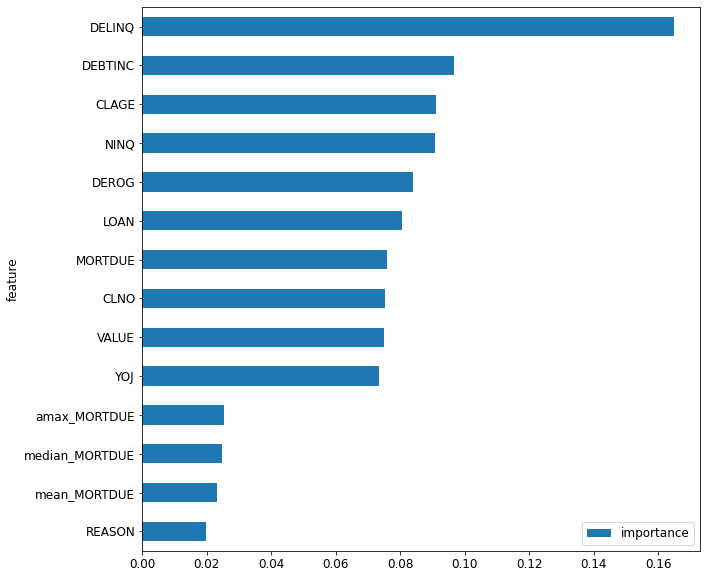

In [ ]:
features.plot(kind='barh', figsize=(10, 10))

Tidak terjadi overfit pada model

In [ ]:
x.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_MORTDUE,median_MORTDUE,amax_MORTDUE
0,1100,25860.00,39025.00,1,10.50,0.00,0.00,94.37,1.00,9.00,34.82,60384.73,60573.00,256431.00
1,1300,70053.00,68400.00,1,7.00,0.00,2.00,121.83,0.00,14.00,34.82,60384.73,60573.00,256431.00
2,1500,13500.00,16700.00,1,4.00,0.00,0.00,149.47,1.00,10.00,34.82,60384.73,60573.00,256431.00
3,1500,65019.00,89235.50,0,7.00,0.00,0.00,173.47,1.00,20.00,34.82,60384.73,60573.00,256431.00
4,1700,97800.00,112000.00,1,3.00,0.00,0.00,93.33,0.00,14.00,34.82,66639.80,64712.00,173975.00


In [ ]:
x_v2 = x.drop(['mean_MORTDUE',	'median_MORTDUE',	'amax_MORTDUE','REASON'], axis=1)

In [ ]:
X_train_v2, X_test_v2, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_over_v2, y_train_over = smote.fit_resample(X_train_v2, y_train)

In [ ]:
model_etc.fit(X_train_over_v2, y_train_over)

score = model_etc.score(X_train_over_v2, y_train_over)

print("Score: ", score)

Score:  1.0


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_v2, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_v2, y_test)))

Training set score: 1.0000
Test set score: 0.9517


In [ ]:
y_pred = model_etc.predict(X_test_v2)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.89      0.92      1490
weighted avg       0.95      0.95      0.95      1490



## Null Accuracy

In [ ]:
y_test.value_counts()

1    1191
0     299
Name: BAD, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (299/(1191+299))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.2007


In [ ]:
y_pred_test = model_etc.predict(X_test)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP) = ', cm[1,0])

Confusion matrix

 [[ 236   63]
 [  12 1179]]

True Positives(TP) =  236

True Negatives(TN) =  1179

False Negatives(FN) =  63

False Positives(FP) =  12


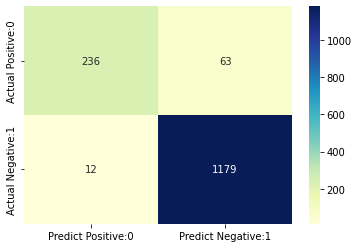

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.89      0.92      1490
weighted avg       0.95      0.95      0.95      1490



### Scaling and Transformation Experiment

#### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_mm = sc.fit_transform(X_train_over)
X_test_mm = sc.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_mm, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_mm, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_mm, y_test)))

Training set score: 1.0000
Test set score: 0.9497


In [ ]:
y_pred = model_etc.predict(X_test_mm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.89      0.92      1490
weighted avg       0.95      0.95      0.95      1490



#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_over_ss = sc.fit_transform(X_train_over)
X_test_ss = sc.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_ss, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_ss, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_ss, y_test)))

Training set score: 1.0000
Test set score: 0.9497


In [ ]:
y_pred = model_etc.predict(X_test_ss)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.89      0.92      1490
weighted avg       0.95      0.95      0.95      1490



In [ ]:
clf = LazyClassifier(predictions=True)
models , predictions = clf.fit(X_train_over_ss, X_test_ss, y_train_over, y_test)
models

100%|██████████| 29/29 [00:18<00:00,  1.53it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.95,0.90,0.90,0.95,0.65
RandomForestClassifier,0.93,0.88,0.88,0.93,1.21
LGBMClassifier,0.93,0.87,0.87,0.93,0.38
LabelSpreading,0.94,0.87,0.87,0.94,3.78
LabelPropagation,0.94,0.87,0.87,0.94,2.44
XGBClassifier,0.93,0.87,0.87,0.93,0.90
BaggingClassifier,0.90,0.86,0.86,0.90,0.43
KNeighborsClassifier,0.94,0.86,0.86,0.93,0.23
DecisionTreeClassifier,0.88,0.81,0.81,0.88,0.10


#### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train_over_rs = sc.fit_transform(X_train_over)
X_test_rs = sc.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_rs, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_rs, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_rs, y_test)))

Training set score: 1.0000
Test set score: 0.9497


In [ ]:
y_pred = model_etc.predict(X_test_rs)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.89      0.92      1490
weighted avg       0.95      0.95      0.95      1490



#### Log Transform

In [ ]:
sc = LogTransform()
X_train_over_log = sc.transform(X_train_over)
X_test_log = sc.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_log, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_log, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_log, y_test)))

Training set score: 1.0000
Test set score: 0.9443


In [ ]:
y_pred = model_etc.predict(X_test_log)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.84       299
           1       0.94      0.99      0.97      1191

    accuracy                           0.94      1490
   macro avg       0.95      0.87      0.91      1490
weighted avg       0.94      0.94      0.94      1490



#### Sqrt Transform

In [ ]:
sc = SQRTTransform()
X_train_over_sqrt = sc.transform(X_train_over)
X_test_sqrt = sc.transform(X_test)

In [ ]:
model_etc.fit(X_train_over_sqrt, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_sqrt, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_sqrt, y_test)))

Training set score: 1.0000
Test set score: 0.9463


In [ ]:
y_pred = model_etc.predict(X_test_sqrt)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       299
           1       0.94      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.88      0.91      1490
weighted avg       0.95      0.95      0.94      1490



#### Log + MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_log_mm = sc.fit_transform(X_train_over_log)
X_test_log_mm = sc.transform(X_test_log)

In [ ]:
model_etc.fit(X_train_over_log_mm, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_log_mm, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_log_mm, y_test)))

Training set score: 1.0000
Test set score: 0.9443


In [ ]:
y_pred = model_etc.predict(X_test_log_mm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.84       299
           1       0.94      0.99      0.97      1191

    accuracy                           0.94      1490
   macro avg       0.95      0.87      0.91      1490
weighted avg       0.94      0.94      0.94      1490



#### Sqrt + MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_over_sqrt_mm = sc.fit_transform(X_train_over_sqrt)
X_test_sqrt_mm = sc.transform(X_test_sqrt)

In [ ]:
model_etc.fit(X_train_over_sqrt_mm, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_sqrt_mm, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_sqrt_mm, y_test)))

Training set score: 1.0000
Test set score: 0.9463


In [ ]:
y_pred = model_etc.predict(X_test_sqrt_mm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       299
           1       0.94      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.88      0.91      1490
weighted avg       0.95      0.95      0.94      1490



#### Sqrt + SS

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_over_sqrt_ss = sc.fit_transform(X_train_over_sqrt)
X_test_sqrt_ss = sc.transform(X_test_sqrt)

In [ ]:
model_etc.fit(X_train_over_sqrt_ss, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over_sqrt_ss, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test_sqrt_ss, y_test)))

Training set score: 1.0000
Test set score: 0.9463


In [ ]:
y_pred = model_etc.predict(X_test_sqrt_ss)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       299
           1       0.94      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.88      0.91      1490
weighted avg       0.95      0.95      0.94      1490



## Teknik Modelling  dengan Stacking dan Voting

###  Voting Classifier dengan 3 models

In [202]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier

In [359]:
models_vote = [('ET',ExtraTreesClassifier(random_state=20)),('RF',RandomForestClassifier(random_state=60)),('XG',XGBClassifier(random_state=60,n_estimators=85))]
ensembles = VotingClassifier(estimators=models_vote,  voting='soft')
ensembles.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('ET', ExtraTreesClassifier(random_state=20)),
                             ('RF', RandomForestClassifier(random_state=60)),
                             ('XG',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=85, n_jobs=No

In [360]:
ensembles.score(X_train_over, y_train_over)

1.0

In [361]:
ensembles.score(X_test, y_test)

0.9375838926174497

###  Stacking Classifier dengan 6 model

In [273]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

level0 = list()
level0.append(('GBM', GradientBoostingClassifier()))
level0.append(('RF', RandomForestClassifier()))
level0.append(('LR', LogisticRegression()))
level0.append(('ETC', ExtraTreesClassifier()))
level0.append(('LGM', LGBMClassifier()))

# define meta learner model
level1 = XGBClassifier(random_state=40)
# define the stacking ensemble
model_stack = StackingClassifier(estimators=level0,
final_estimator=level1, cv=5)
# fit the model on all available data
model_stack.fit(X_train_over, y_train_over)

StackingClassifier(cv=5,
                   estimators=[('GBM', GradientBoostingClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('LR', LogisticRegression()),
                               ('ETC', ExtraTreesClassifier()),
                               ('LGM', LGBMClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=

In [269]:
model_stack.score(X_train_over, y_train_over)

1.0

In [274]:
model_stack.score(X_test, y_test)

0.9610738255033557

In [276]:
pred_stack=model_stack.predict(X_test)

In [277]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_stack))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       299
           1       0.96      0.99      0.98      1191

    accuracy                           0.96      1490
   macro avg       0.96      0.92      0.94      1490
weighted avg       0.96      0.96      0.96      1490



In [278]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_stack)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FN) = ', cm[0,1])

print('\nFalse Negatives(FP) = ', cm[1,0])

Confusion matrix

 [[ 255   44]
 [  14 1177]]

True Positives(TP) =  255

True Negatives(TN) =  1177

False Positives(FN) =  44

False Negatives(FP) =  14


<AxesSubplot:>

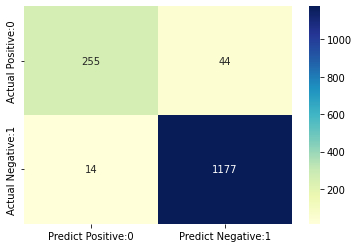

In [280]:
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])

sn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [327]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_probs = model_stack.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]
# calculate scores
test_auc = roc_auc_score(y_test, pred_stack)
# summarize scores
print('StackingClassifier: ROC AUC=%.3f' % (test_auc))

# calculate roc curves
etc_fpr, etc_tpr, _ = roc_curve(y_test, pred_stack)

StackingClassifier: ROC AUC=0.921


Dari hasil modeling dengan menggunakan 6 model stacking didapatkan tingkat akurasi, presisi, recal dan f1 score yang lebih tinggi yaitu score akurasi 0.96. Jika dibandingkan dengan menggunakan 1 model yaitu ExtraTreesClassifier atau  votiong classification dengan 3 model, maka hasil modeling dengan Stacking Classification memberikan hasil yang lebih baik.

## Modeling dengan Deep Learning

### ANN dengan Multi Layer Perceptron Classifier

In [324]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=8, max_iter=150, activation='relu', hidden_layer_sizes=60, solver='adam',batch_size=200).fit(X_train_over, y_train_over)

In [325]:
print('Score Train:',clf.score(X_train_over, y_train_over))
print('Score Test:',clf.score(X_test, y_test))

Score Train: 0.5135474860335195
Score Test: 0.802013422818792


Nilai Akurasi masih sangat rendah dibandingkan model lainnya

### ANN Multi Layer Sequential Model dengan Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
 

In [ ]:
models = Sequential()
models.add(Dense(500, kernel_initializer='uniform', activation='relu'))
models.add(Dense(100, kernel_initializer='uniform', activation='relu'))
models.add(Dense(50, kernel_initializer='uniform', activation='relu'))
models.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
models.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
models.fit(X_train_over, y_train_over, epochs=20)

Epoch 1/20
140/140 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.7944
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8172
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8358
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8369
Epoch 5/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3936 - accuracy: 0.8405
Epoch 6/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8405
Epoch 7/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3835 - accuracy: 0.8463
Epoch 8/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8490
Epoch 9/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3797 - accuracy: 0.8485
Epoch 10/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3774 - accuracy: 0.8481
Epoch 11/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.8515
Epoch 12/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3731 - accuracy: 0.8499
Epoch 13/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8519
Epoch 14/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8528
Epoch 15/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.8508
Epoch 16/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8537
Epoch 17/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.8535
Epoch 18/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8566
Epoch 19/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.8532
Epoch 20/20
140/140 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8550

Dari hasil teknik modeling dengan menggunakan deep learning ANN maka didapatkan hasil akurasi yang lebing rendah dibandingkan ExtraTreesClassifier maupun Stacking Classifier , yaitu dengan akurasi training sebesar 0.8550

## Hyperparameter Tuning

In [ ]:
X_train_over.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,mean_MORTDUE,median_MORTDUE,amax_MORTDUE
0,12900,61031.00,71550.00,1,28.00,0.00,2.00,178.09,0.00,23.00,34.80,60384.73,60573.00,256431.00
1,15000,122486.00,159000.00,0,5.00,0.00,0.00,137.00,1.00,21.00,34.82,66639.80,64712.00,173975.00
2,6500,63144.00,76754.00,1,2.00,0.00,2.00,129.08,0.00,23.00,29.06,81664.33,75142.00,399550.00
3,7900,77221.00,95316.00,0,4.00,0.00,0.00,116.31,0.00,25.00,35.43,94537.28,82018.00,399412.00
4,12300,90006.00,121122.00,0,9.00,0.00,0.00,133.50,1.00,21.00,36.91,66639.80,64712.00,173975.00


In [ ]:
y_train_over.value_counts()

1    3580
0    3580
Name: BAD, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

model_etc = ExtraTreesClassifier(random_state=0)
model_etc.fit(X_train_over, y_train_over)

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9497


## Cross Validation and Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators=[100,500,1000]
max_features=[4,7,10]
min_samples_leaf=[1,3,5]
criterion=['gini','entropy']
class_weight=["balanced", None]
random_state = [0]
grid = dict(n_estimators=n_estimators, 
            max_features=max_features,  
            criterion=criterion,
            min_samples_leaf=min_samples_leaf,
            class_weight=class_weight,
            random_state=random_state)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=model_etc, param_grid=grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy',error_score=0)
grid_result = grid_search.fit(X_train_over, y_train_over)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.981052 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 0}
0.980121 (0.004752) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 0}
0.980912 (0.004287) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 0}
0.980819 (0.004783) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 1000, 'random_state': 0}
0.960708 (0.005676) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 100, 'random_state': 0}
0.963361 (0.006417) with: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 500, 'random_state': 0}
0.963966 (0.006455) with: {'class_weight': 'balanced'

# Final Model ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc_final = ExtraTreesClassifier(
                                      class_weight= 'balanced', 
                                      criterion= 'entropy', 
                                      max_features= 4, 
                                      min_samples_leaf= 1, 
                                      n_estimators= 500, 
                                      random_state= 0
                                      )
model_etc_final.fit(X_train_over, y_train_over)

ExtraTreesClassifier(class_weight='balanced', criterion='entropy',
                     max_features=4, n_estimators=500, random_state=0)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_etc_final.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(model_etc_final.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9477


In [ ]:
y_pred_test = model_etc_final.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_test)

array([[ 232,   67],
       [  11, 1180]])

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FN) = ', cm[0,1])

print('\nFalse Negatives(FP) = ', cm[1,0])

Confusion matrix

 [[ 232   67]
 [  11 1180]]

True Positives(TP) =  232

True Negatives(TN) =  1180

False Positives(FN) =  67

False Negatives(FP) =  11


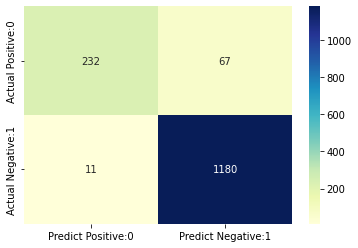

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:0', 'Predict Negative:1'], 
                                 index=['Actual Positive:0', 'Actual Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.88      0.91      1490
weighted avg       0.95      0.95      0.95      1490



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

### Accuracy

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9477


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0523


### Precision

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9547


### Recall/ Sensitivity / True Positive Rate

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7759


### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0092


### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9908


### F1-Score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [ ]:
f1_score = 2*(recall*precision)/(recall+precision)

print('F1-Score : {0:0.4f}'.format(f1_score))

F1-Score : 0.8561


In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = model_etc_final.predict_proba(X_test)

y_pred_prob[:10]

array([[0.032, 0.968],
       [0.208, 0.792],
       [0.01 , 0.99 ],
       [0.078, 0.922],
       [0.014, 0.986],
       [0.026, 0.974],
       [0.122, 0.878],
       [0.02 , 0.98 ],
       [0.718, 0.282],
       [0.   , 1.   ]])

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Default Customer (0)', 'Prob of - No Default Customer (1)'])

y_pred_prob_df

,Prob of - Default Customer (0),Prob of - No Default Customer (1)
0,0.03,0.97
1,0.21,0.79
2,0.01,0.99
3,0.08,0.92
4,0.01,0.99
...,...,...
1485,0.40,0.60
1486,0.00,1.00
1487,0.01,0.99
1488,0.02,0.98


In [ ]:
# store the predicted probabilities for class 0 - Probability of default

y_pred0 = model_etc_final.predict_proba(X_test)[:, 0]

Text(0, 0.5, 'Frequency')

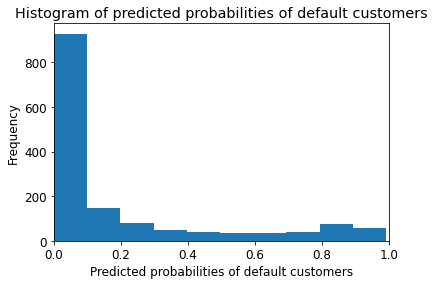

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred0, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of default customers')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of default customers')
plt.ylabel('Frequency')

Model cenderung memprediksi kelas 1 atau No Default karena kelas yang imbalance

## ROC - AUC <a class="anchor" id="18"></a>



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`







In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).






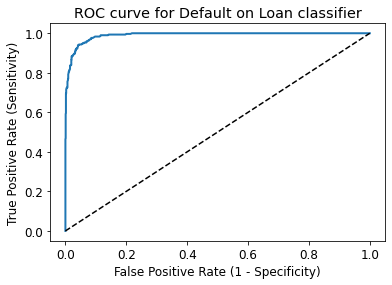

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred0, pos_label = 0)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Default on Loan classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_probs = model_etc_final.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]
# calculate scores
test_auc = roc_auc_score(y_test, y_probs)
# summarize scores
print('ExtraTreesClassifier: ROC AUC=%.3f' % (test_auc))

# calculate roc curves
etc_fpr, etc_tpr, _ = roc_curve(y_test, y_probs)

ExtraTreesClassifier: ROC AUC=0.990


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_auc = cross_val_score(model_etc_final, X_test, y_test, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_auc))

Cross validated ROC AUC : 0.9429


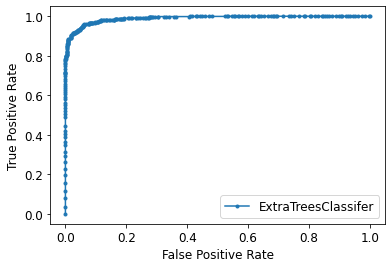

In [ ]:
# plot the roc curve for the model
plt.plot(etc_fpr, etc_tpr, marker='.', label='ExtraTreesClassifer')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# XGBoost

In [ ]:
from xgboost import XGBClassifier

# fit model no training data
model_xgb = XGBClassifier(random_state=0)
model_xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = model_xgb.predict(X_test)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP) = ', cm[1,0])

Confusion matrix

 [[ 231   68]
 [  31 1160]]

True Positives(TP) =  231

True Negatives(TN) =  1160

False Negatives(FN) =  68

False Positives(FP) =  31


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       299
           1       0.94      0.97      0.96      1191

    accuracy                           0.93      1490
   macro avg       0.91      0.87      0.89      1490
weighted avg       0.93      0.93      0.93      1490

accuracy score:  0.9335570469798657
auc score:  0.873273351698497


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_xgb.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(model_xgb.score(X_test, y_test)))

Training set score: 0.9987
Test set score: 0.9336


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV 


param_test1 = {
              'max_depth':list(range(3,10,2)), 
              'min_child_weight':list(range(1,6,2))
              }

gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, gamma=0, subsample=0.8, colsample_bytree=0.8,n_estimators=500,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=0), 
                                                  param_grid = param_test1, scoring='balanced_accuracy',n_jobs=-1,iid=False, cv=5)

gsearch1.fit(X_train_over, y_train_over)

print("Best: %f using %s" % (gsearch1.best_score_, gsearch1.best_params_))
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
params = gsearch1.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_test1):
    print("%f (%f) with: %r" % (mean, stdev, param_test1))

Best: 0.948883 using {'max_depth': 9, 'min_child_weight': 1}
0.927514 (0.068868) with: {'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]}
0.925559 (0.069299) with: {'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]}


In [ ]:
param_test2 = { 'max_depth':[8,9,10], 'min_child_weight':[1,2,3] }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=500, max_depth=5,
                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
                        param_grid = param_test2, scoring='balanced_accuracy',n_jobs=-1,iid=False, cv=5
                        )

gsearch2.fit(X_train_over, y_train_over)

print("Best: %f using %s" % (gsearch2.best_score_, gsearch2.best_params_))
means = gsearch2.cv_results_['mean_test_score']
stds = gsearch2.cv_results_['std_test_score']
params = gsearch2.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_test2):
    print("%f (%f) with: %r" % (mean, stdev, param_test2))

Best: 0.949162 using {'max_depth': 8, 'min_child_weight': 1}
0.949162 (0.052165) with: {'max_depth': [8, 9, 10], 'min_child_weight': [1, 2, 3]}
0.946927 (0.052879) with: {'max_depth': [8, 9, 10], 'min_child_weight': [1, 2, 3]}


### Tuning Gamma

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=8,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
                                                  param_grid = param_test3, scoring='balanced_accuracy',n_jobs=-1,iid=False, cv=5)

gsearch3.fit(X_train_over, y_train_over)

print("Best: %f using %s" % (gsearch3.best_score_, gsearch3.best_params_))
means = gsearch3.cv_results_['mean_test_score']
stds = gsearch3.cv_results_['std_test_score']
params = gsearch3.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_test3):
    print("%f (%f) with: %r" % (mean, stdev, param_test3))

Best: 0.949162 using {'gamma': 0.0}
0.949162 (0.052165) with: {'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]}


### Tuning Subsample

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=8,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
                                                  param_grid = param_test4, scoring='balanced_accuracy',n_jobs=-1,iid=False, cv=5)

gsearch4.fit(X_train_over, y_train_over)

print("Best: %f using %s" % (gsearch4.best_score_, gsearch4.best_params_))
means = gsearch4.cv_results_['mean_test_score']
stds = gsearch4.cv_results_['std_test_score']
params = gsearch4.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_test4):
    print("%f (%f) with: %r" % (mean, stdev, param_test4))

Best: 0.950978 using {'colsample_bytree': 0.6, 'subsample': 0.6}
0.950978 (0.052357) with: {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
0.948464 (0.057040) with: {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}


In [ ]:
param_test4b = {
 'subsample':[i/100 for i in range(40,75,5)],
 'colsample_bytree':[i/100 for i in range(40,75,5)]
}

gsearch4b = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=8,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
                                                  param_grid = param_test4b, scoring='balanced_accuracy',n_jobs=-1,iid=False, cv=5)

gsearch4b.fit(X_train_over, y_train_over)

print("Best: %f using %s" % (gsearch4b.best_score_, gsearch4b.best_params_))
means = gsearch4b.cv_results_['mean_test_score']
stds = gsearch4b.cv_results_['std_test_score']
params = gsearch4b.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_test4b):
    print("%f (%f) with: %r" % (mean, stdev, param_test4b))

Best: 0.950978 using {'colsample_bytree': 0.6, 'subsample': 0.6}
0.943296 (0.057326) with: {'subsample': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7], 'colsample_bytree': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]}
0.945251 (0.060031) with: {'subsample': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7], 'colsample_bytree': [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]}


### Tuning Regularization Parameters

In [ ]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2,0, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=8,
                                                  min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.6,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
                                                  param_grid = param_test5, scoring='balanced_accuracy',n_jobs=-1,iid=False, cv=5)

gsearch5.fit(X_train_over, y_train_over)

print("Best: %f using %s" % (gsearch5.best_score_, gsearch5.best_params_))
means = gsearch5.cv_results_['mean_test_score']
stds = gsearch5.cv_results_['std_test_score']
params = gsearch5.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_test5):
    print("%f (%f) with: %r" % (mean, stdev, param_test5))

Best: 0.950978 using {'reg_alpha': 0}
0.950419 (0.053474) with: {'reg_alpha': [1e-05, 0.01, 0, 0.1, 1, 100]}


### Tuning Learning Rate

In [ ]:
param_test6 = {
 'learning_rate':[1e-3, 1e-2, 0.05, 0.1]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=8, reg_alpha=0,
                                                  min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.6,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0), 
                                                  param_grid = param_test6, scoring='balanced_accuracy',n_jobs=-1,iid=False, cv=5)

gsearch6.fit(X_train_over, y_train_over)

print("Best: %f using %s" % (gsearch6.best_score_, gsearch6.best_params_))
means = gsearch6.cv_results_['mean_test_score']
stds = gsearch6.cv_results_['std_test_score']
params = gsearch6.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_test6):
    print("%f (%f) with: %r" % (mean, stdev, param_test6))

Best: 0.950978 using {'learning_rate': 0.1}
0.898045 (0.057984) with: {'learning_rate': [0.001, 0.01, 0.05, 0.1]}


## Final Model XGBoost

In [ ]:
from xgboost import XGBClassifier

# fit model no training data
final_model_xgb = XGBClassifier(learning_rate =0.1, n_estimators=500, max_depth=8, reg_alpha=0,
                          min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.6,
                          objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=0)
final_model_xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
y_pred = final_model_xgb.predict(X_test)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Negatives(FN) = ', cm[0,1])

print('\nFalse Positives(FP) = ', cm[1,0])

Confusion matrix

 [[ 233   66]
 [  35 1156]]

True Positives(TP) =  233

True Negatives(TN) =  1156

False Negatives(FN) =  66

False Positives(FP) =  35


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.88      0.91      1490
weighted avg       0.95      0.95      0.95      1490



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

### Accuracy

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9322


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0678


### Precision

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8694


### Recall/ Sensitivity / True Positive Rate

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7793


### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0294


### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9706


### F1-Score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [ ]:
f1_score = 2*(recall*precision)/(recall+precision)

print('F1-Score : {0:0.4f}'.format(f1_score))

F1-Score : 0.8219


In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = final_model_xgb.predict_proba(X_test)

y_pred_prob[:10]

array([[3.2228827e-03, 9.9677712e-01],
       [9.2137969e-01, 7.8620285e-02],
       [1.6188622e-04, 9.9983811e-01],
       [5.9756637e-03, 9.9402434e-01],
       [1.6987324e-04, 9.9983013e-01],
       [4.3922663e-04, 9.9956077e-01],
       [1.9602776e-02, 9.8039722e-01],
       [6.1869621e-04, 9.9938130e-01],
       [3.5363954e-01, 6.4636046e-01],
       [4.6730042e-03, 9.9532700e-01]], dtype=float32)

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Default Customer (0)', 'Prob of - No Default Customer (1)'])

y_pred_prob_df

,Prob of - Default Customer (0),Prob of - No Default Customer (1)
0,0.00,1.00
1,0.92,0.08
2,0.00,1.00
3,0.01,0.99
4,0.00,1.00
...,...,...
1485,0.23,0.77
1486,0.00,1.00
1487,0.00,1.00
1488,0.00,1.00


In [ ]:
# store the predicted probabilities for class 0 - Probability of default

y_pred0 = final_model_xgb.predict_proba(X_test)[:, 0]

Text(0, 0.5, 'Frequency')

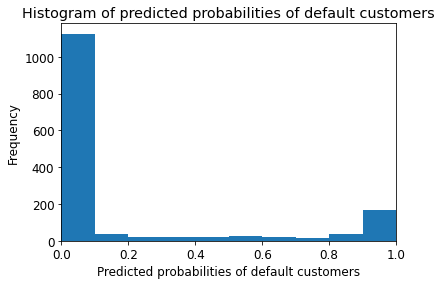

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred0, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of default customers')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of default customers')
plt.ylabel('Frequency')

Model cenderung memprediksi kelas 1 atau No Default karena kelas yang imbalance

### ROC - AUC <a class="anchor" id="18"></a>



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`







In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).






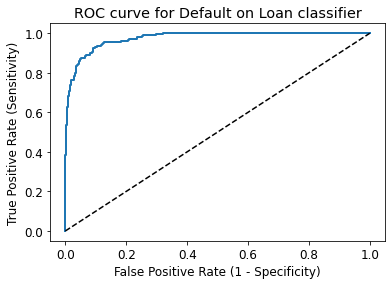

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred0, pos_label = 0)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Default on Loan classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_probs = final_model_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]
# calculate scores
test_auc = roc_auc_score(y_test, y_probs)
# summarize scores
print('XGBoost: ROC AUC=%.3f' % (test_auc))

# calculate roc curves
etc_fpr, etc_tpr, _ = roc_curve(y_test, y_probs)

XGBoost: ROC AUC=0.975


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_auc = cross_val_score(final_model_xgb, X_test, y_test, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_auc))

Cross validated ROC AUC : 0.9179


# Summary
*   Model ExtraTreesClassifier memberikan hasil yang lebih baik dibandingkan XGBoost
*   Selanjutnnya akan dilakukan pembobotan terhadap y_prob



In [ ]:
#Load Model
import pickle

infile = open(PATH+'model_etc_final.pickle','rb')
model_etc_final = pickle.load(infile)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 0.23.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 0.23.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
y_pred_test = model_etc_final.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_test)

array([[ 232,   67],
       [  11, 1180]])

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FN) = ', cm[0,1])

print('\nFalse Negatives(FP) = ', cm[1,0])

Confusion matrix

 [[ 232   67]
 [  11 1180]]

True Positives(TP) =  232

True Negatives(TN) =  1180

False Positives(FN) =  67

False Negatives(FP) =  11


In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

### Accuracy

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9477


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0523


### Recall/ Sensitivity / True Positive Rate

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7759


### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0092


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


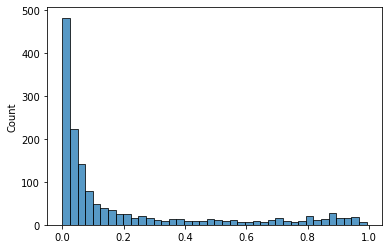

In [ ]:
y_pred0 = model_etc_final.predict_proba(X_test)[:,0]

sns.histplot(y_pred0, bins=40)
plt.show()

# Improvisation

In [ ]:
y_pred_df = pd.DataFrame(y_pred0, columns=['probability_to_default'], index=y_test.index)
y_pred_df

,probability_to_default
1634,0.032
1718,0.208
4237,0.010
1095,0.078
1644,0.014
...,...
3487,0.396
2785,0.004
5229,0.010
2768,0.022


In [ ]:
y_test_df = pd.DataFrame(y_test.tolist(), columns=['Target'], index=y_test.index)
y_test_df

,Target
1634,1
1718,1
4237,1
1095,1
1644,1
...,...
3487,0
2785,1
5229,1
2768,1


In [ ]:
y.value_counts()

1    4771
0    1189
Name: BAD, dtype: int64

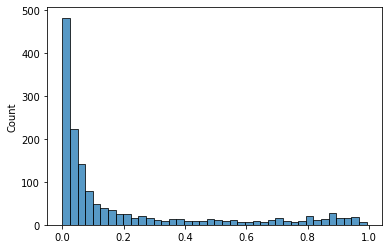

In [ ]:
sns.histplot(y_pred0, bins=40)
plt.show()

In [ ]:
y_pred_df.describe()

,probability_to_default
count,1490.000000
mean,0.197534
std,0.281578
min,0.000000
25%,0.016000
50%,0.054000
75%,0.243500
max,0.992000


**Karena perbandingan kelas 1:4 maka dilakukan penalti untuk threshold yaitu 0.25, maka rumus threshold akan menjadi :**

```
Threshold = Q3 + IQR*(Penalti)
```



In [ ]:
# Pembulatan 2 angka di belakang koma
IQR = y_pred_df.quantile(0.75).round(2) -  y_pred_df.quantile(0.25).round(2)
threshold = y_pred_df.quantile(0.75).round(2) + IQR*(0.25)
threshold

probability_to_default    0.295
dtype: float64

In [ ]:
print("If threshold : 0.3 : ",len(y_pred_df[y_pred_df['probability_to_default']>= 0.295]))

print("Count of Default loan : ",len(y_test_df[y_test_df['Target']==0]))

If threshold : 0.3 :  335
Count of Default loan :  299


In [ ]:
index_prob = y_pred_df[y_pred_df['probability_to_default']>=0.295].index.tolist()
index_target = y_test_df[y_test_df['Target']==0].index.tolist()

In [ ]:
index_prob[:10]

[5387, 1547, 1740, 1546, 0, 2541, 905, 561, 3882, 1483]

In [ ]:
len(np.intersect1d(index_prob, index_target))

282

In [ ]:
diff_prob = np.setdiff1d(index_prob, index_target)
diff_prob

array([   4,  171,  210,  318,  332,  415,  510,  582,  615,  631,  640,
        663,  665,  672,  825,  979, 1130, 1163, 1228, 1252, 1310, 1355,
       1457, 1490, 1580, 1585, 1598, 1721, 1723, 1729, 2199, 2201, 2311,
       2370, 2575, 2578, 2773, 2836, 2911, 3253, 3470, 3783, 4246, 4321,
       4601, 4803, 4873, 5083, 5316, 5334, 5574, 5698, 5887])

In [ ]:
diff_target = np.setdiff1d(index_target, index_prob)
diff_target

array([ 245,  426, 1188, 1524, 1884, 2143, 2302, 2354, 2534, 2635, 2864,
       3021, 3399, 3545, 3814, 4205, 5900])

# Scorecard
Pelabelan akan dilakukan menggunakan interval peluang.

  *   0  - 0.295 = 1   **Bad**
  *   0.295 - 0.5   = 2   **Potential**
  *   0.5  - 1     = 3   **Good** 





In [ ]:
list_score = []
for i,j in y_pred_df.iterrows():
  if j['probability_to_default'] < 0.295:
    val = 3
  elif j['probability_to_default'] < 0.5:
    val = 2
  else :
    val = 1 
  list_score.append(val)

In [ ]:
y_pred_df['score'] = list_score
y_pred_df

,probability_to_default,score
1634,0.032,3
1718,0.208,3
4237,0.010,3
1095,0.078,3
1644,0.014,3
...,...,...
3487,0.396,2
2785,0.004,3
5229,0.010,3
2768,0.022,3


In [ ]:
list_score_v2 = []
for i,j in y_pred_df.iterrows():
  if j['probability_to_default'] < 0.295:
    val=1
  else:
    val=0
  list_score_v2.append(val)

y_pred_df['pred_thresh'] = list_score_v2

## Metrics After Scoring

In [ ]:
cm = confusion_matrix(y_test, y_pred_df['pred_thresh'])
cm

array([[ 282,   17],
       [  53, 1138]])

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_df['pred_thresh']))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       299
           1       0.99      0.96      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.91      0.95      0.93      1490
weighted avg       0.96      0.95      0.95      1490



### Accuracy

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9530


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0470


### Precision

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8418


### Recall/ Sensitivity / True Positive Rate

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9431


### False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0445


### Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9555


### F1-Score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [ ]:
f1_score = 2*(recall*precision)/(recall+precision)

print('F1-Score : {0:0.4f}'.format(f1_score))

F1-Score : 0.8896


### ROC - AUC <a class="anchor" id="18"></a>



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`







In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).






In [ ]:
y_pred1 = model_etc_final.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred1)
print("AUC :",roc_auc.round(2))

AUC : 0.99


In [ ]:
# store the predicted probabilities for class 0 - Probability of default

y_pred0 = model_etc_final.predict_proba(X_test)[:, 0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


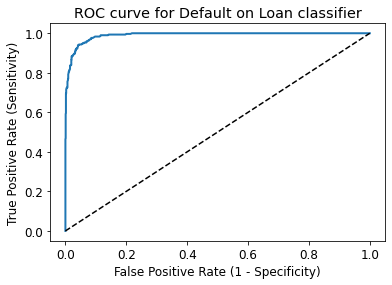

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred0, pos_label = 0)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Default on Loan classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Balanced Accuracy

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred_df['pred_thresh'])
print("Balanced Accuracy :", balanced_accuracy.round(2))

Balanced Accuracy : 0.95


# Some Finalization

In [ ]:
all_pred_df = df.iloc[y_pred_df.index]
all_pred_df = pd.merge(all_pred_df, y_pred_df, left_index=True, right_index=True)
all_pred_df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,probability_to_default,score,pred_thresh
1634,1,11700,37093.0,62116.0,0,Mgr,7.0,0.0,0.0,173.466667,1.0,20.0,37.010949,0.032,3,1
1718,1,12000,87000.0,101200.0,0,Sales,13.0,0.0,2.0,151.133333,1.0,18.0,34.818262,0.208,3,1
4237,1,22000,61251.0,91744.0,0,Office,0.0,0.0,0.0,145.489155,0.0,21.0,34.347909,0.010,3,1
1095,1,9800,55330.0,78154.0,1,Mgr,2.0,0.0,1.0,122.705537,0.0,23.0,28.896102,0.078,3,1
1644,1,11700,68059.0,86216.0,0,Other,3.0,0.0,0.0,175.658568,1.0,35.0,30.253970,0.014,3,1


In [ ]:
all_pred_df[all_pred_df['score']==3].describe() 

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,probability_to_default,score,pred_thresh
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.0,1155.0
mean,0.985281,19398.787879,75739.619481,105719.534199,0.283983,8.827273,0.077056,0.204329,191.689681,0.942857,21.580952,33.217433,0.059314,3.0,1.0
std,0.120476,11023.976481,43597.978607,54861.160465,0.451124,7.475718,0.363096,0.642095,84.339301,1.385812,9.514979,6.811546,0.067231,0.0,0.0
min,0.000000,2300.000000,4810.000000,13930.000000,0.000000,0.000000,0.000000,0.000000,3.044384,0.000000,0.000000,1.603508,0.000000,3.0,1.0
25%,1.000000,12000.000000,48879.500000,68622.000000,0.000000,3.000000,0.000000,0.000000,123.743572,0.000000,15.000000,29.262000,0.012000,3.0,1.0
50%,1.000000,17200.000000,65019.000000,92299.000000,0.000000,7.000000,0.000000,0.000000,179.719245,1.000000,20.000000,34.818262,0.032000,3.0,1.0
75%,1.000000,24100.000000,94548.500000,124406.000000,1.000000,12.000000,0.000000,0.000000,241.487283,1.000000,26.000000,38.378553,0.082000,3.0,1.0
max,1.000000,89000.000000,367917.000000,469771.000000,1.000000,36.000000,6.000000,5.000000,649.747104,11.000000,56.000000,45.569843,0.294000,3.0,1.0


In [ ]:
all_pred_df[all_pred_df['score']==1].describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,probability_to_default,score,pred_thresh
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.0,243.0
mean,0.045267,16725.925926,69019.526749,93267.087695,0.329218,7.578189,0.823045,1.234568,141.179248,2.164609,19.736626,36.451676,0.779185,1.0,0.0
std,0.208319,11958.210062,53621.132557,61035.263506,0.470899,6.634363,1.586866,1.851546,69.698495,2.525421,11.841436,13.965024,0.137813,0.0,0.0
min,0.000000,1100.000000,4734.000000,9500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.909225,0.500000,1.0,0.0
25%,0.000000,9000.000000,38943.000000,59822.500000,0.000000,3.000000,0.000000,0.000000,95.633333,1.000000,12.000000,34.818262,0.675000,1.0,0.0
50%,0.000000,14500.000000,63800.000000,85000.000000,0.000000,6.000000,0.000000,1.000000,124.900000,1.000000,19.000000,34.818262,0.806000,1.0,0.0
75%,0.000000,20400.000000,78446.500000,108046.000000,1.000000,10.000000,1.000000,2.000000,173.466667,3.000000,26.000000,34.818262,0.892000,1.0,0.0
max,1.000000,77400.000000,399550.000000,512650.000000,1.000000,41.000000,10.000000,13.000000,385.500000,17.000000,71.000000,203.312149,0.992000,1.0,0.0


In [ ]:
all_pred_df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,probability_to_default,score,pred_thresh
1634,1,11700,37093.0,62116.0,0,Mgr,7.0,0.0,0.0,173.466667,1.0,20.0,37.010949,0.032,1,1
1718,1,12000,87000.0,101200.0,0,Sales,13.0,0.0,2.0,151.133333,1.0,18.0,34.818262,0.208,1,1
4237,1,22000,61251.0,91744.0,0,Office,0.0,0.0,0.0,145.489155,0.0,21.0,34.347909,0.010,1,1
1095,1,9800,55330.0,78154.0,1,Mgr,2.0,0.0,1.0,122.705537,0.0,23.0,28.896102,0.078,1,1
1644,1,11700,68059.0,86216.0,0,Other,3.0,0.0,0.0,175.658568,1.0,35.0,30.253970,0.014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,0,18400,72718.0,98065.0,0,Other,8.0,0.0,0.0,119.057817,0.0,19.0,35.364128,0.396,2,0
2785,1,15700,80200.0,88545.0,0,Mgr,21.0,0.0,0.0,242.600388,10.0,24.0,36.297033,0.004,1,1
5229,1,28300,137159.0,186153.0,0,Mgr,0.0,0.0,0.0,112.172813,1.0,38.0,29.874731,0.010,1,1
2768,1,15600,102881.0,117868.0,0,Other,11.0,0.0,0.0,287.441131,2.0,19.0,31.759877,0.022,1,1


In [ ]:
y_pred = model_etc_final.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
all_pred_df['prediction_by_model'] = y_pred.tolist()
all_pred_df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,probability_to_default,score,pred_thresh,prediction_by_model
1634,1,11700,37093.0,62116.0,0,Mgr,7.0,0.0,0.0,173.466667,1.0,20.0,37.010949,0.032,1,1,1
1718,1,12000,87000.0,101200.0,0,Sales,13.0,0.0,2.0,151.133333,1.0,18.0,34.818262,0.208,1,1,1
4237,1,22000,61251.0,91744.0,0,Office,0.0,0.0,0.0,145.489155,0.0,21.0,34.347909,0.010,1,1,1
1095,1,9800,55330.0,78154.0,1,Mgr,2.0,0.0,1.0,122.705537,0.0,23.0,28.896102,0.078,1,1,1
1644,1,11700,68059.0,86216.0,0,Other,3.0,0.0,0.0,175.658568,1.0,35.0,30.253970,0.014,1,1,1


In [ ]:
# Predicton by model
cm1 = confusion_matrix(y_test, all_pred_df['prediction_by_model'])
cm1

array([[ 232,   67],
       [  11, 1180]])

In [ ]:
print(classification_report(y_test, all_pred_df['prediction_by_model']))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       299
           1       0.95      0.99      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.95      0.88      0.91      1490
weighted avg       0.95      0.95      0.95      1490



In [ ]:
# Prediction by thresh
cm2 = confusion_matrix(y_test, all_pred_df['pred_thresh'])
cm2

array([[ 282,   17],
       [  53, 1138]])

In [ ]:
print(classification_report(y_test, all_pred_df['pred_thresh']))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       299
           1       0.99      0.96      0.97      1191

    accuracy                           0.95      1490
   macro avg       0.91      0.95      0.93      1490
weighted avg       0.96      0.95      0.95      1490



# Scorecard Exploration

In [ ]:
all_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 1634 to 3579
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BAD                     1490 non-null   int64  
 1   LOAN                    1490 non-null   int64  
 2   MORTDUE                 1490 non-null   float64
 3   VALUE                   1490 non-null   float64
 4   REASON                  1490 non-null   int64  
 5   JOB                     1490 non-null   object 
 6   YOJ                     1490 non-null   float64
 7   DEROG                   1490 non-null   float64
 8   DELINQ                  1490 non-null   float64
 9   CLAGE                   1490 non-null   float64
 10  NINQ                    1490 non-null   float64
 11  CLNO                    1490 non-null   float64
 12  DEBTINC                 1490 non-null   float64
 13  probability_to_default  1490 non-null   float64
 14  score                   1490 non-null

In [ ]:
col = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'probability_to_default',
       'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

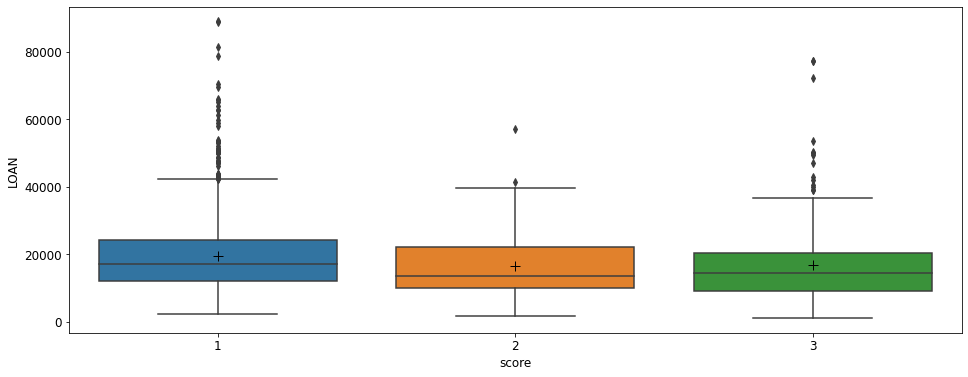

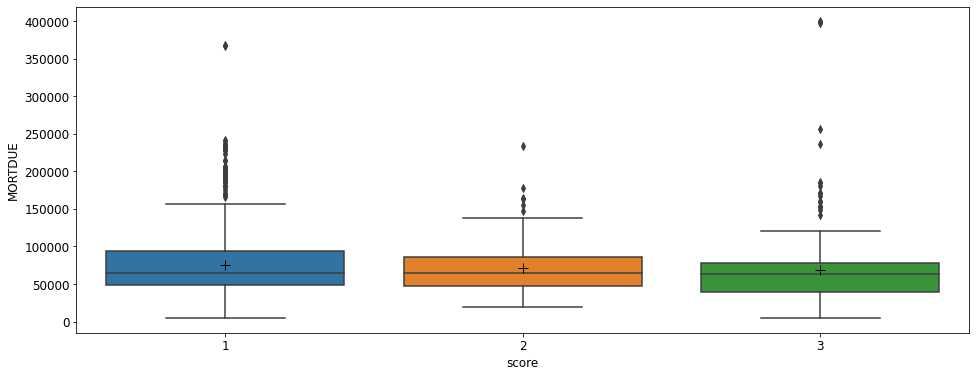

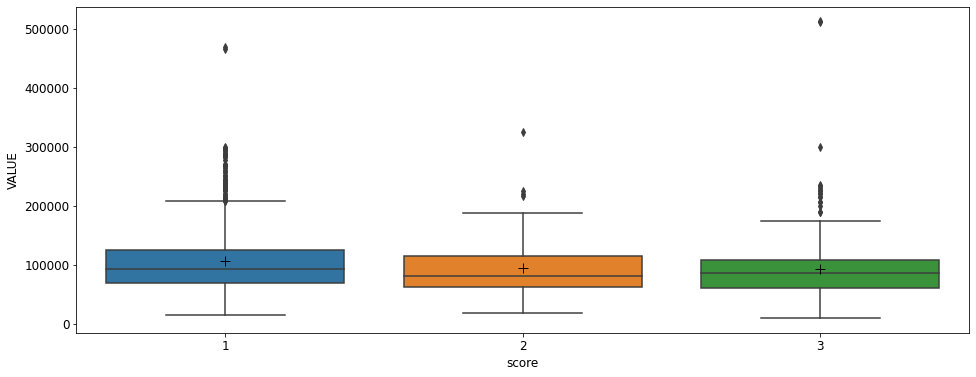

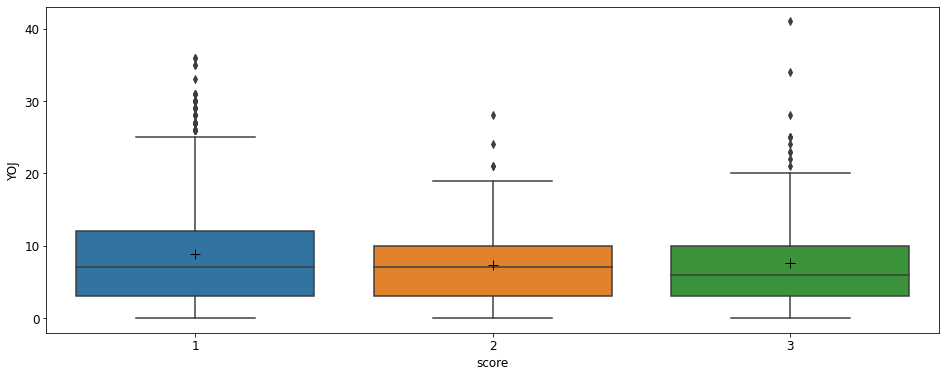

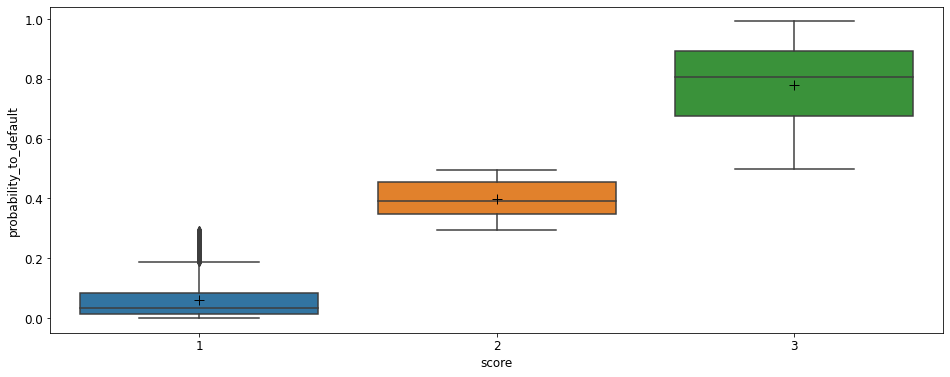

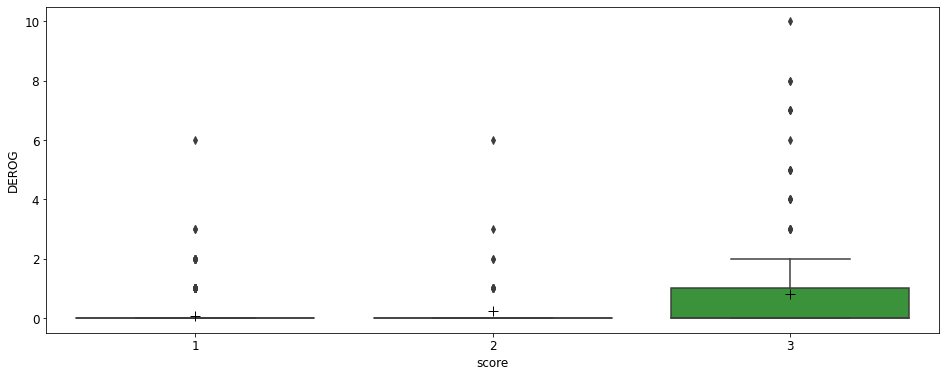

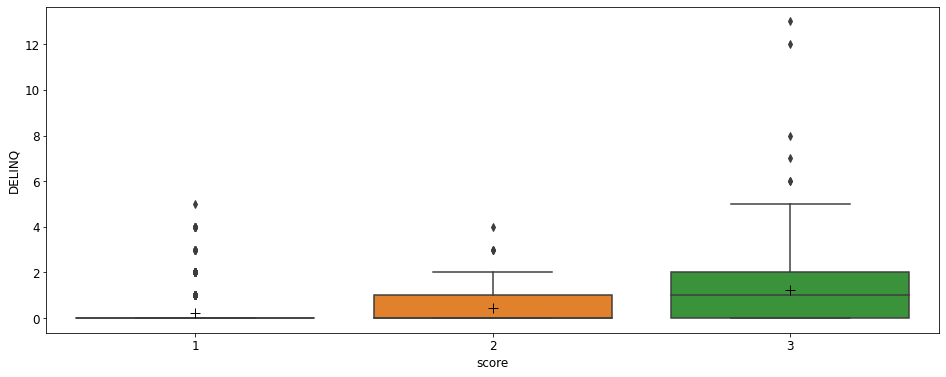

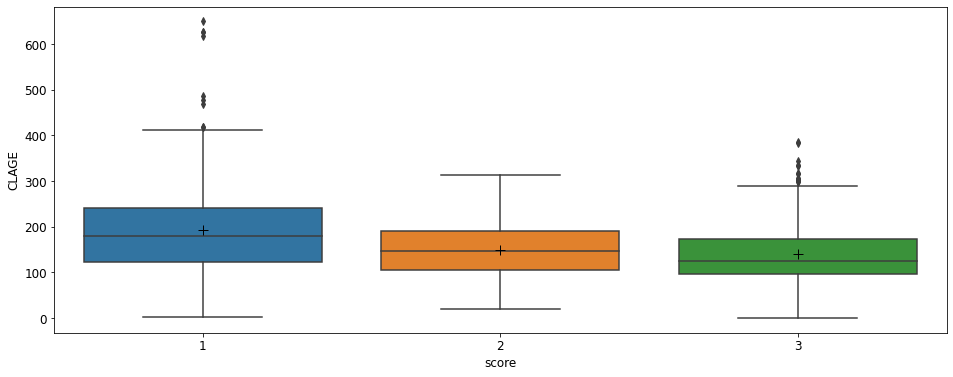

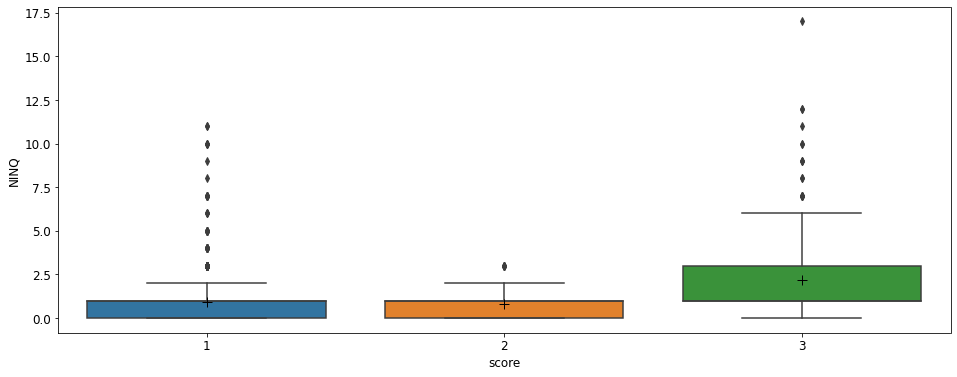

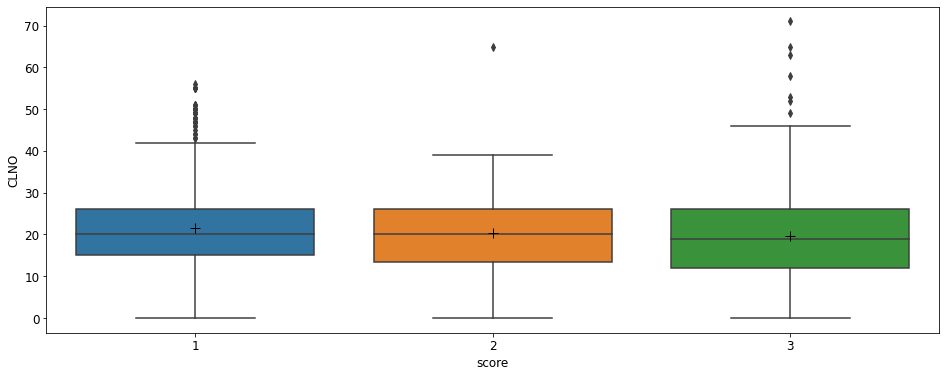

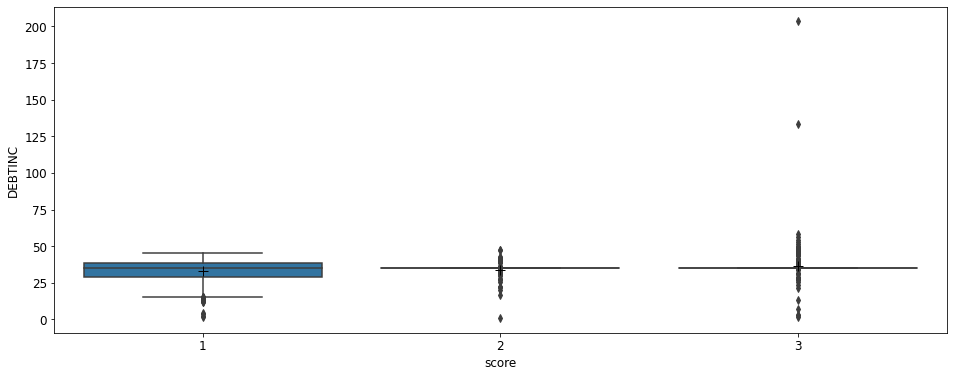

In [ ]:
for i in range(len(col)):
  plt.figure(figsize=(16,6))
  sns.boxplot(x='score', y=col[i], data=all_pred_df, showmeans=True, meanprops={"marker": "+",
                        "markeredgecolor": "black",
                        "markersize": "10"})
  plt.show()

# Save Model

In [ ]:
import pickle

pickle.dump(model_etc_final, open(PATH+"model_etc_final.pickle", 'wb'))